In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience
import pims
import trackpy as tp
import trackpy.predict
from scipy.misc import imsave
from scipy.misc import imread
import math
################################################
# Read frames which have been data-cleaned (wire_particle_tracking_datacleaning). 
################################################
picL = 18333
picR = 18158
FrameL = pims.ImageSequence('/Users/pinghanchu/Documents/Git/Data/Clean_Data_Shot119_Cam_{}/invframe/frame_*.tif'.format(picL))
FrameR = pims.ImageSequence('/Users/pinghanchu/Documents/Git/Data/Clean_Data_Shot119_Cam_{}/invframe/frame_*.tif'.format(picR))
#FrameL = pims.ImageSequence('/Users/pinghanchu/Documents/Git/Data/Clean_Data_Shot119_Cam_{}/frame_white_*.tif'.format(picL))
#FrameR = pims.ImageSequence('/Users/pinghanchu/Documents/Git/Data/Clean_Data_Shot119_Cam_{}/frame_white_*.tif'.format(picR))
v0L = imread('./FrameL_sum.tif')
v0R = imread('./FrameR_sum.tif')
bk0L = imread('./FrameL0.tif')
bk0R = imread('./FrameR0.tif')

In [2]:
###################################
#Locate Features; single frame test
###################################
#init_index = 100
#f = tp.locate(FrameL[init_index], 3, minmass=5) 
#Show points located. It will be better to have more points rather than missing points.
#plt.figure(figsize=[12,12])  # make a new figure
#tp.annotate(f, FrameL[init_index]);

In [3]:
#Show 'mass' distribution
#fig, ax = plt.subplots()
#ax.hist(f['mass'], bins=20)
# Optionally, label the axes.
#ax.set(xlabel='mass', ylabel='count');
#plt.show()

In [4]:
######################################################################
#Locate Features; apply the same parameter to all frames
######################################################################
# Left frame
pred = trackpy.predict.NearestVelocityPredict()
#pred = trackpy.predict.ChannelPredict(0.5, 'x', minsamples=3)
fL = tp.batch(FrameL, 3, minmass=5);
tL = pred.link_df(fL, 3, memory=11,  diagnostics=True)
tL.to_csv('trackL_frameless_inv.csv')

Frame 4743: 6 trajectories present


In [5]:
#tL = pd.read_csv('../../Data/frameless/trackL_frameless.csv')
tL.head()

diag_remembered diag_search_range diag_subnet diag_subnet_iterations  \
0             NaN               NaN         NaN                    NaN   
1             NaN               NaN         NaN                    NaN   
2             NaN               NaN         NaN                    NaN   
3             NaN               NaN         NaN                    NaN   
4             NaN               NaN         NaN                    NaN   

  diag_subnet_size       ecc   ep  frame        mass  particle  raw_mass  \
0              NaN  0.528409  0.0      0   58.738626       0.0     157.0   
1              NaN  0.368421  0.0      0   68.174550       1.0     162.0   
2              NaN  0.454545  0.0      0   30.194956       2.0      66.0   
3              NaN  0.402778  0.0      0   23.825708       3.0      44.0   
4              NaN  0.344340  0.0      0  210.185204       4.0     542.0   

      signal      size           x          y  
0  17.220561  0.840730   83.176707   4.000000  
1  18.871848  0.850402  137.871972   5.854671  
2   9.435924  0.829156  276.000000   9.000000  
3   6.841045  0.844317  135.000000  51.000000  
4  60.154015  0.844870   45.995511  54.836139

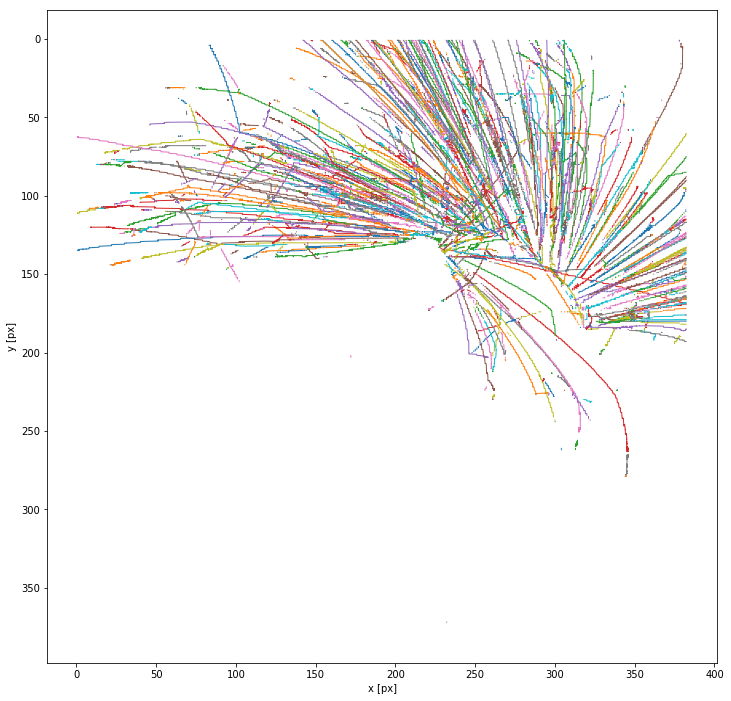

In [6]:
plt.figure(figsize=[12,12])
tp.plot_traj(tL);

In [7]:
plt.figure(figsize=[12,12])
plt.imshow(v0L+bk0L)
#plt.scatter(tL['x'],tL['y'],s=0.3,c='g')
plt.scatter(tL['x'],tL['y'],s=0.3,c=tL['mass'])
plt.show()

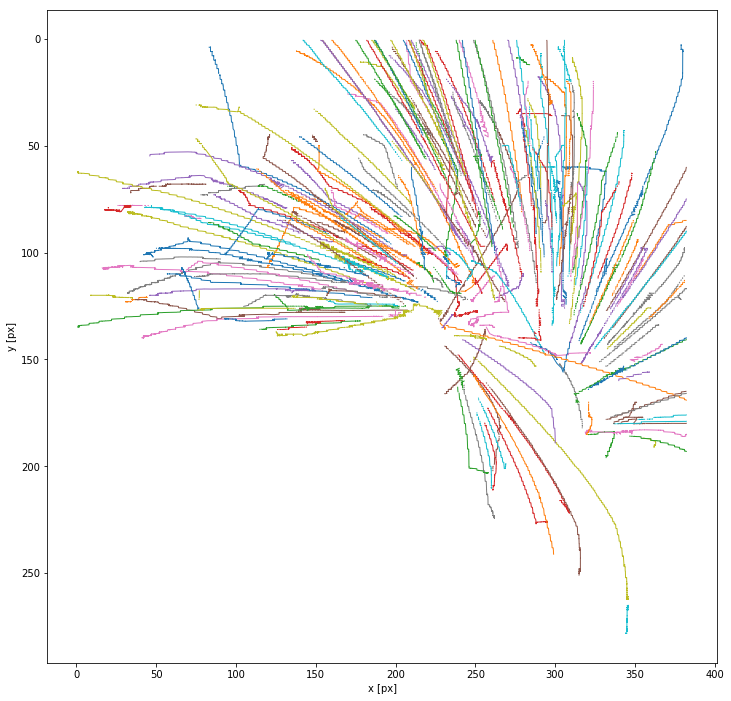

In [8]:
tL1 = tp.filter_stubs(tL,500)
plt.figure(figsize=[12,12])
tp.plot_traj(tL1);

In [9]:
plt.figure(figsize=[12,12])
plt.imshow(v0L)
plt.scatter(tL1['x'],tL1['y'],s=0.3,c=tL1['mass'])
#plt.scatter(tL1['x'],tL1['y'],s=0.3,c='r')
plt.show()

In [10]:
tL2 = tL1
range_limit = 10
Range = {}
for ii in tL2['particle'].unique():
    Track = tL2[tL2['particle']==ii]
    xmax = np.max(Track['x'])
    xmin = np.min(Track['x'])
    ymax = np.max(Track['y'])
    ymin = np.min(Track['y'])
    ra = math.sqrt((xmax-xmin)*(xmax-xmin)+(ymax-ymin)*(ymax-ymin))
    Range[ii] = ra

In [11]:
RANGE = []
for ii in range(len(tL2)):
    RANGE.append(Range[tL2['particle'].iloc[ii]])
    #print(ii,Range[tL2['particle'].iloc[ii]])

In [12]:
tL2['range'] = RANGE

In [13]:
tL2.head()

diag_remembered diag_search_range diag_subnet diag_subnet_iterations  \
frame                                                                        
0                 NaN               NaN         NaN                    NaN   
0                 NaN               NaN         NaN                    NaN   
0                 NaN               NaN         NaN                    NaN   
0                 NaN               NaN         NaN                    NaN   
0                 NaN               NaN         NaN                    NaN   

      diag_subnet_size       ecc   ep  frame        mass  particle  raw_mass  \
frame                                                                          
0                  NaN  0.528409  0.0      0   58.738626       0.0     157.0   
0                  NaN  0.368421  0.0      0   68.174550       1.0     162.0   
0                  NaN  0.454545  0.0      0   30.194956       2.0      66.0   
0                  NaN  0.402778  0.0      0   23.825708       3.0      44.0   
0                  NaN  0.344340  0.0      0  210.185204       4.0     542.0   

          signal      size           x          y       range  
frame                                                          
0      17.220561  0.840730   83.176707   4.000000  146.441840  
0      18.871848  0.850402  137.871972   5.854671  158.710600  
0       9.435924  0.829156  276.000000   9.000000    8.608093  
0       6.841045  0.844317  135.000000  51.000000  101.122558  
0      60.154015  0.844870   45.995511  54.836139   85.768837

In [14]:
tL3 = tL2[tL2['range']>20]

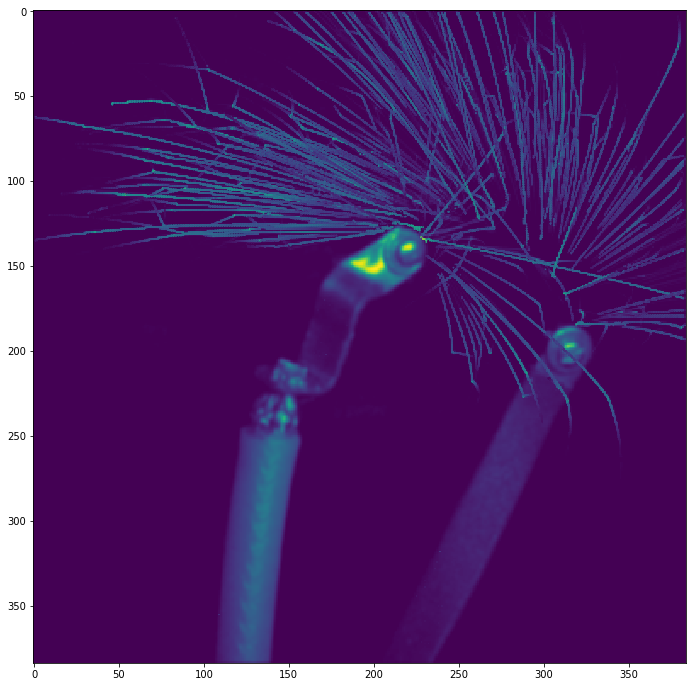

In [15]:
plt.figure(figsize=[12,12])
plt.imshow(v0L+bk0L)
plt.scatter(tL3['x'],tL3['y'],s=0.3,c=tL3['mass'])
#plt.scatter(tL3['x'],tL3['y'],s=0.1,c='g')
plt.savefig('sumTrackL.tif')
plt.show()

In [16]:
for ii in tL3['particle'].unique():
#for ii in range(3,4):  
    #print(ii)
    Track = tL3[tL3['particle']==ii]
    xmax = np.max(Track['x'])
    xmin = np.min(Track['x'])
    ymax = np.max(Track['y'])
    ymin = np.min(Track['y'])
    plt.figure(figsize=[12,12])
    plt.imshow(v0L)
    plt.scatter(Track['x'],Track['y'],s=0.7,c=Track['mass'])
    plt.ylim(ymin-10,ymax+10)
    plt.xlim(xmin-10,xmax+10)
    plt.savefig("./trackL_framebk_{}.tif".format(int(ii)))

/Users/pinghanchu/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


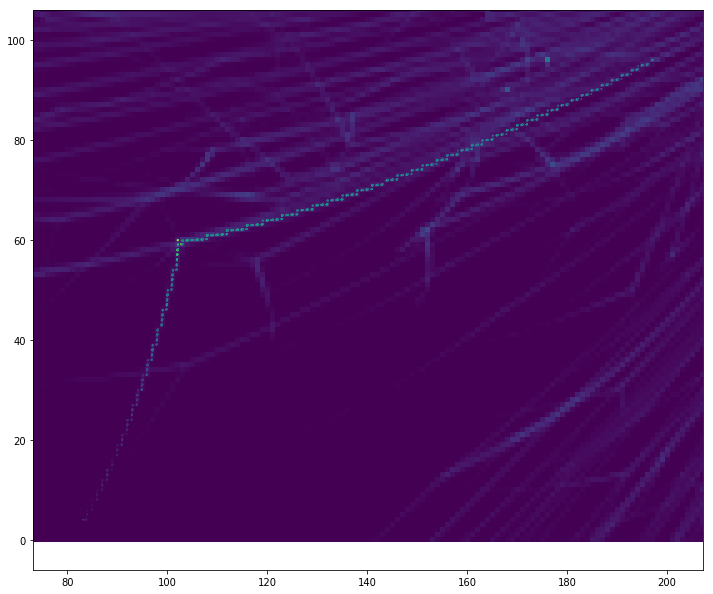

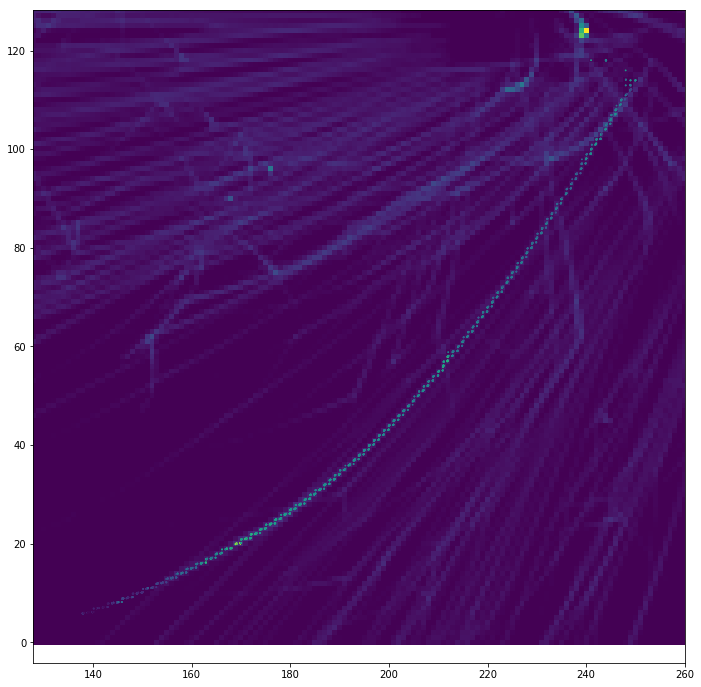

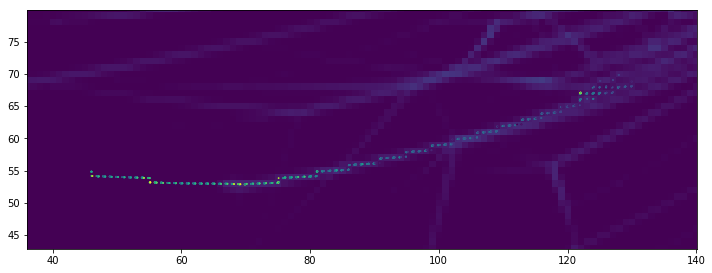

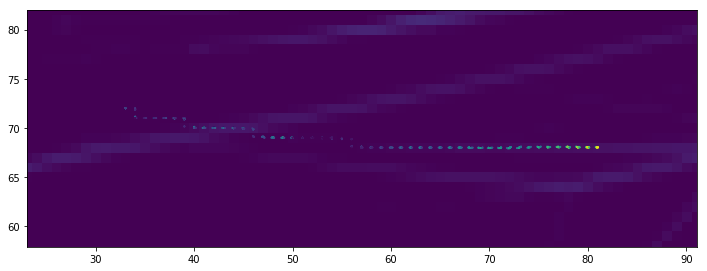

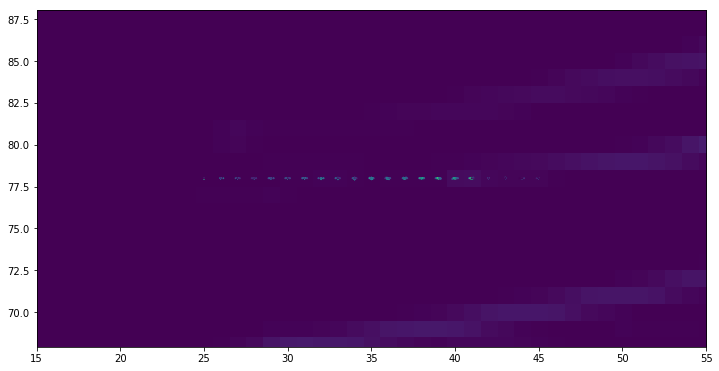

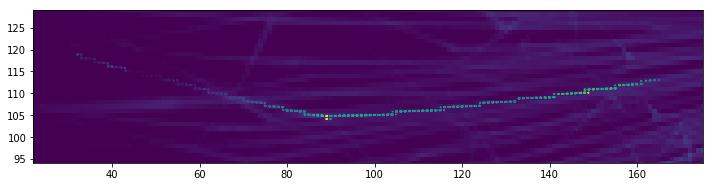

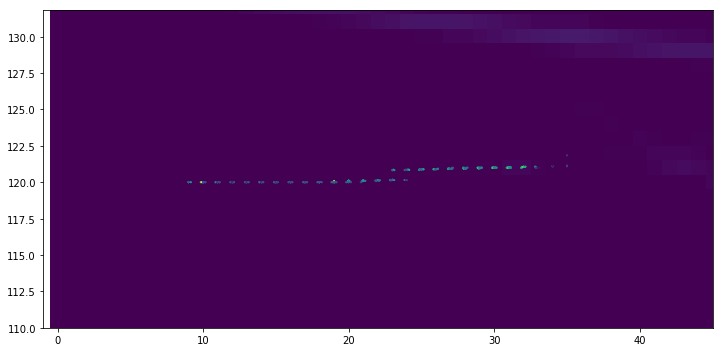

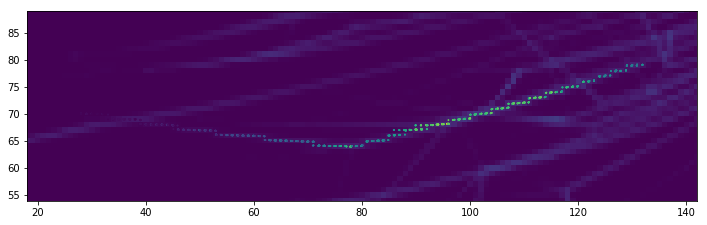

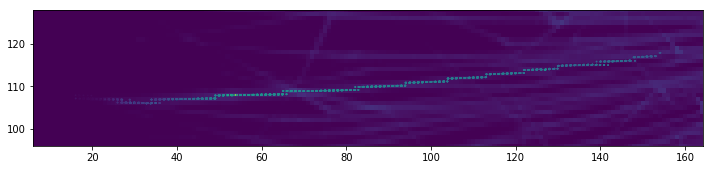

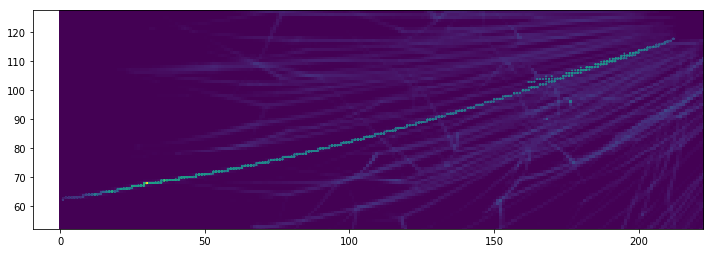

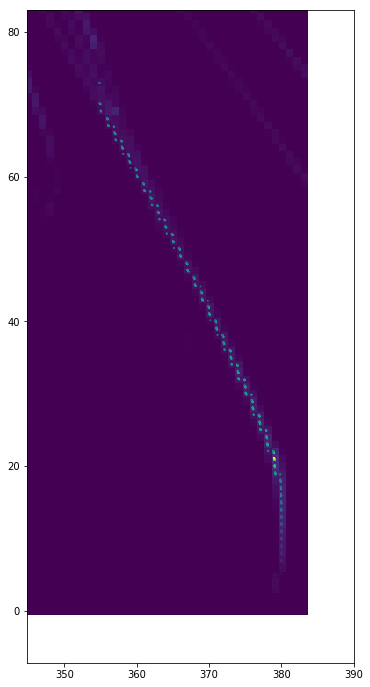

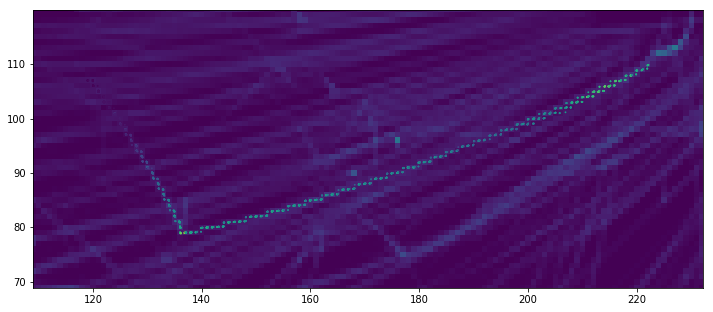

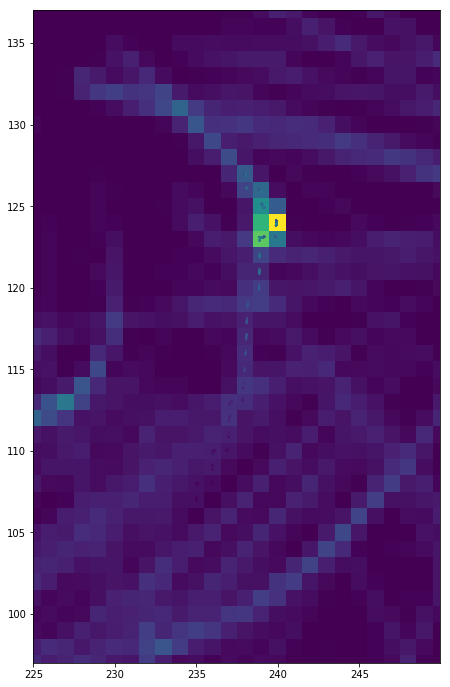

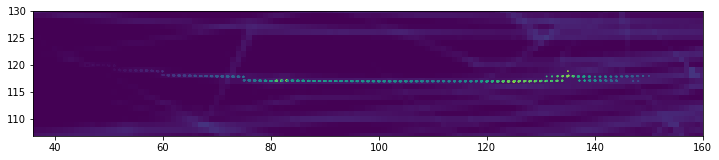

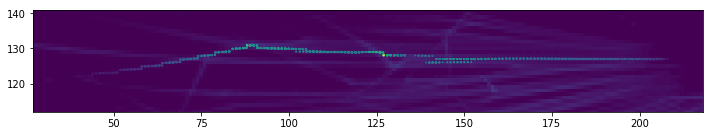

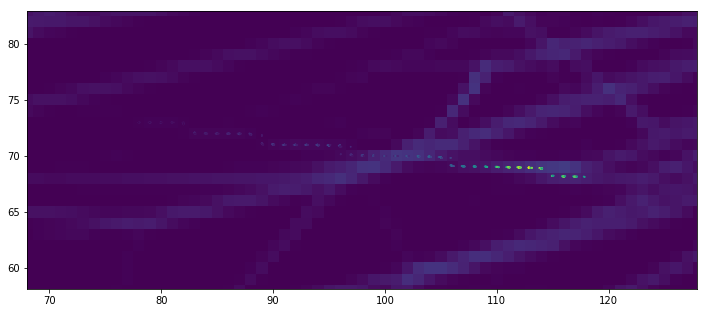

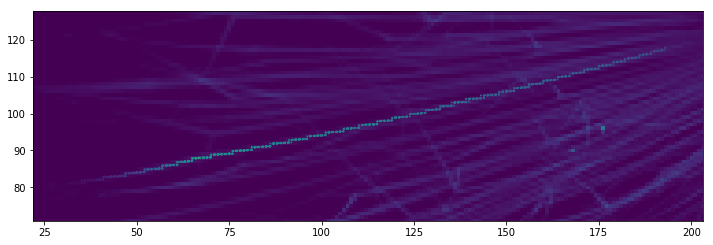

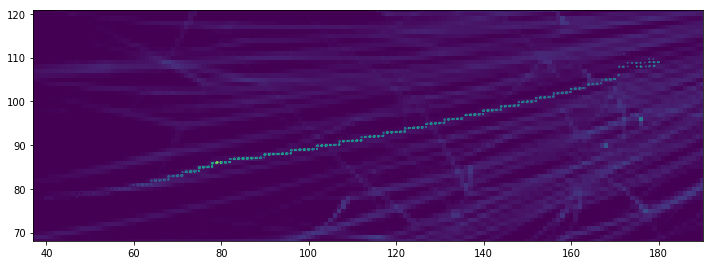

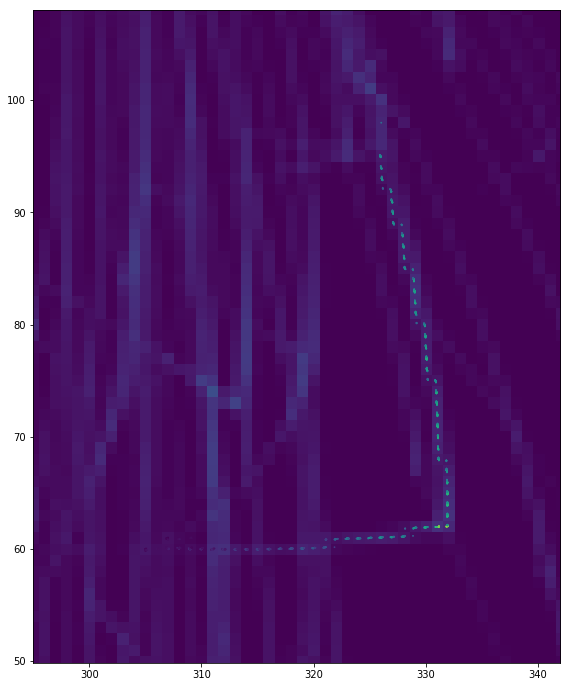

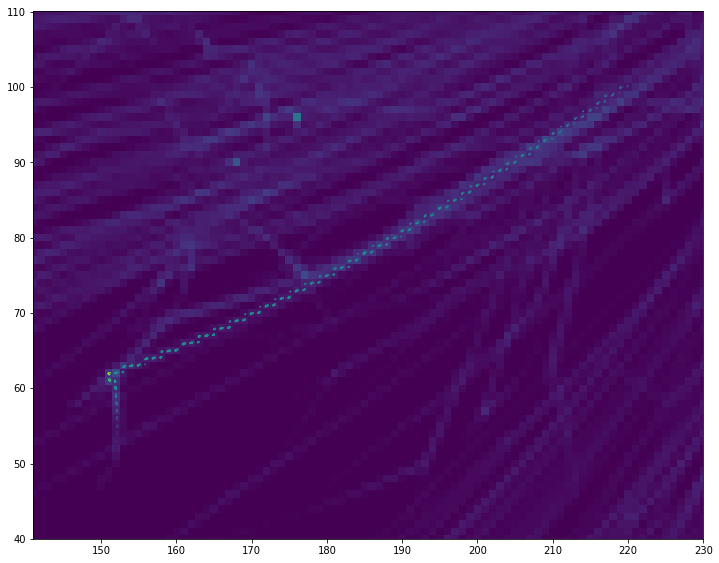

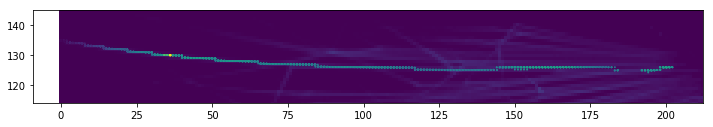

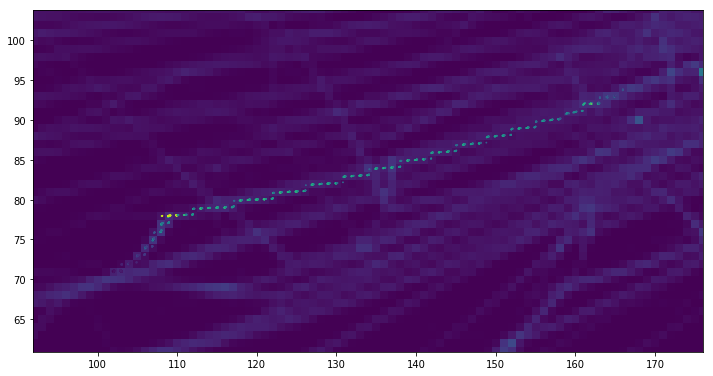

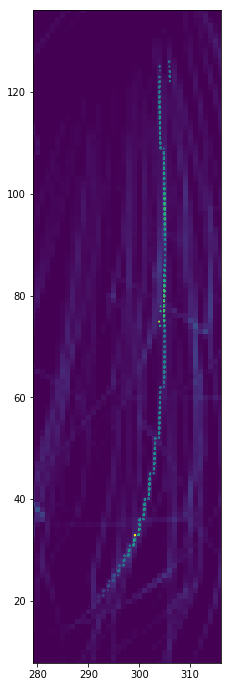

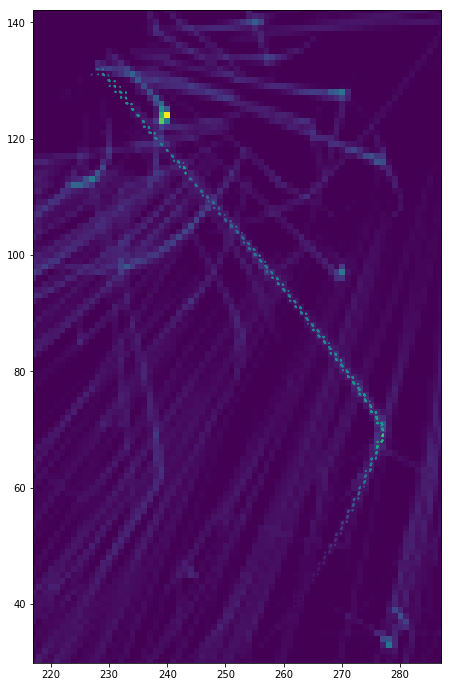

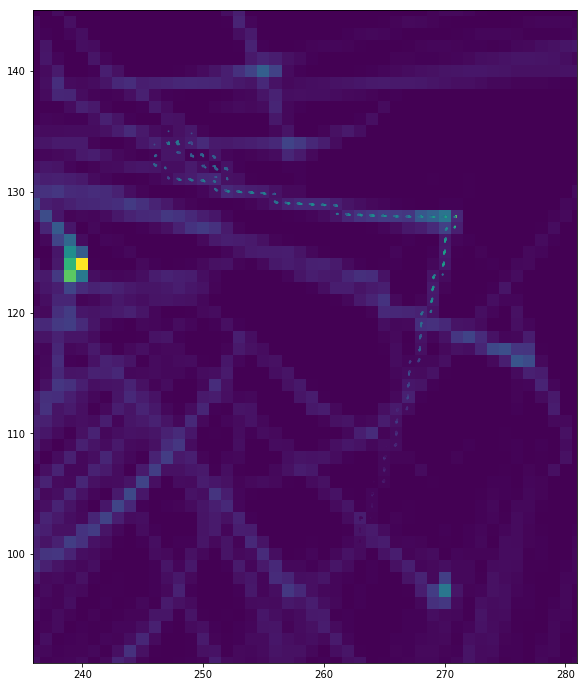

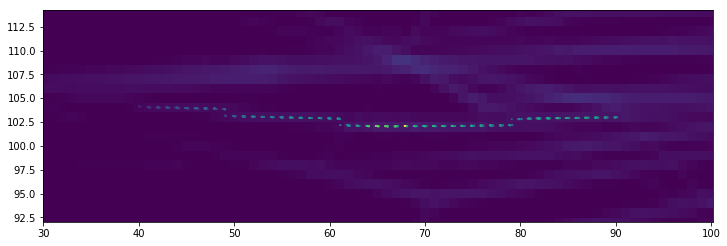

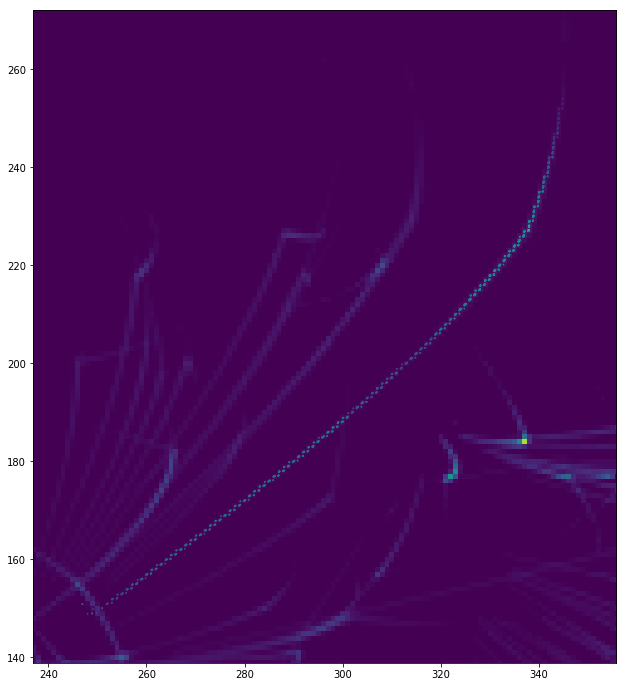

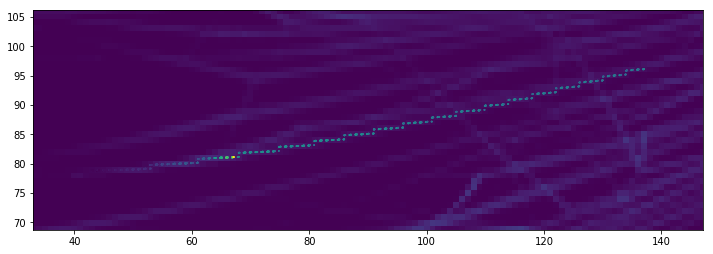

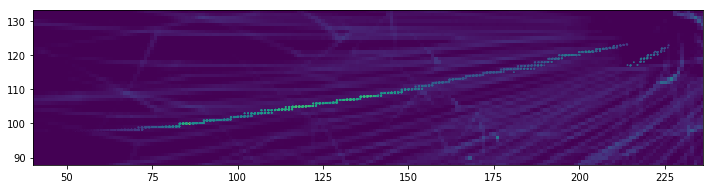

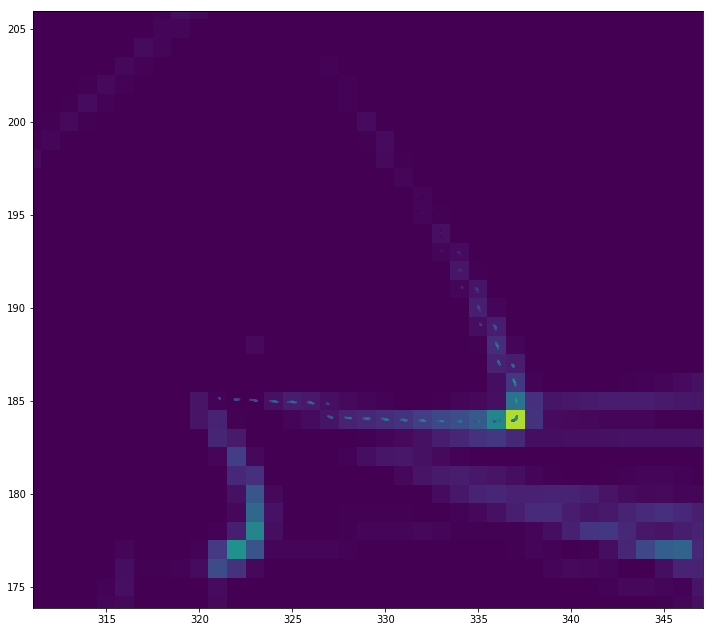

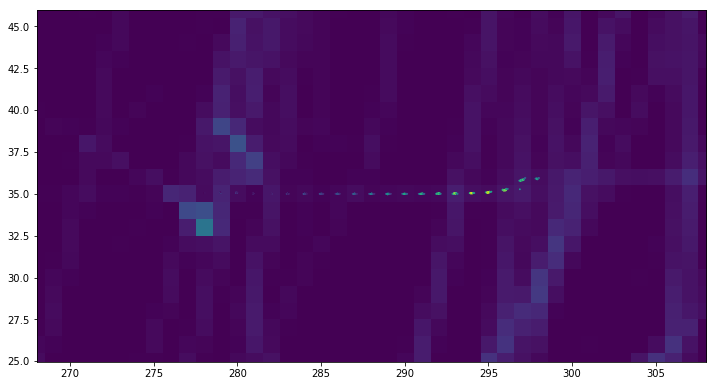

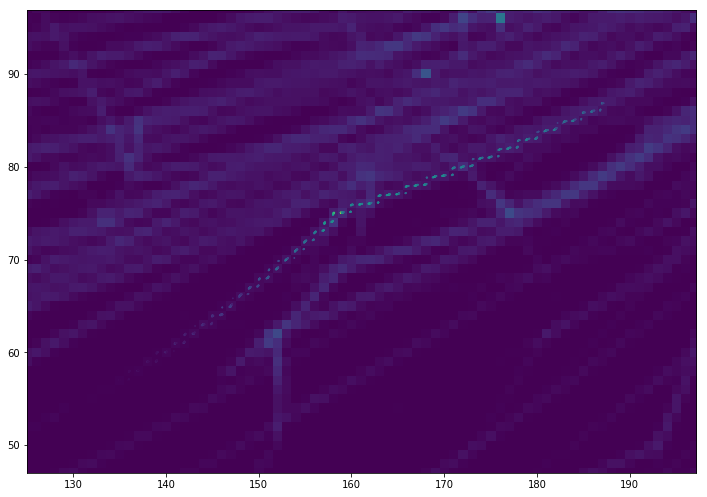

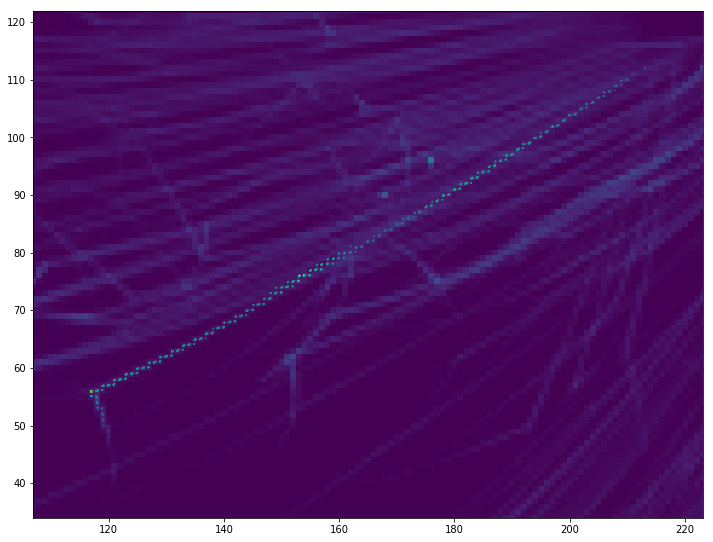

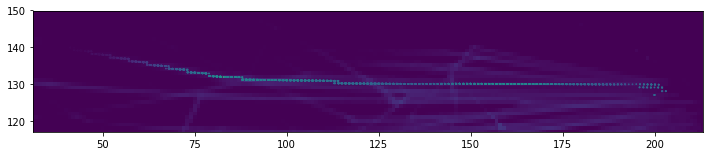

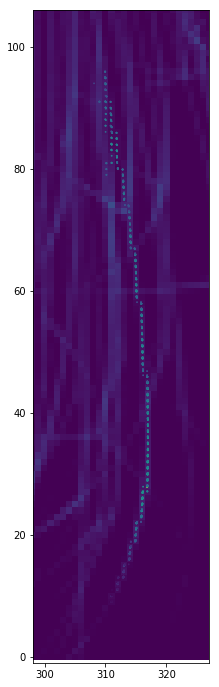

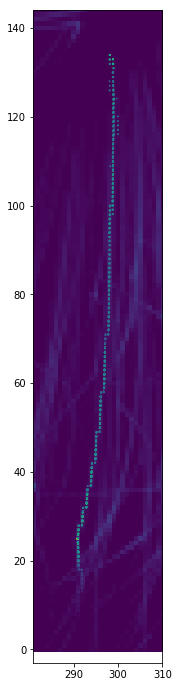

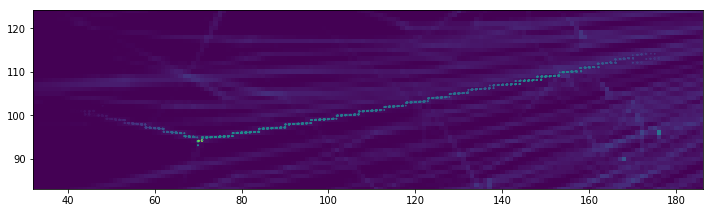

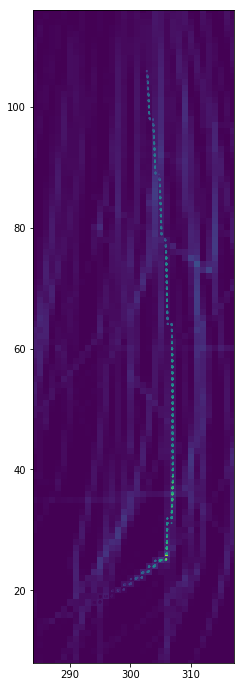

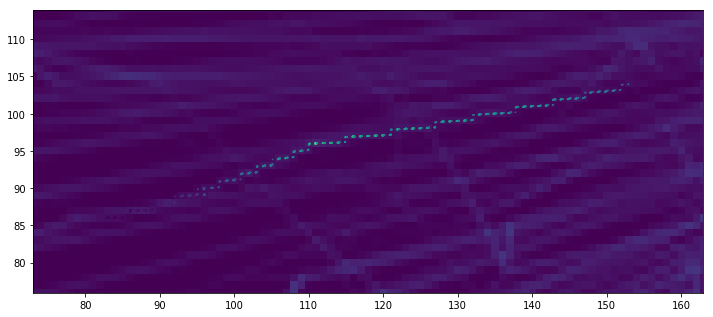

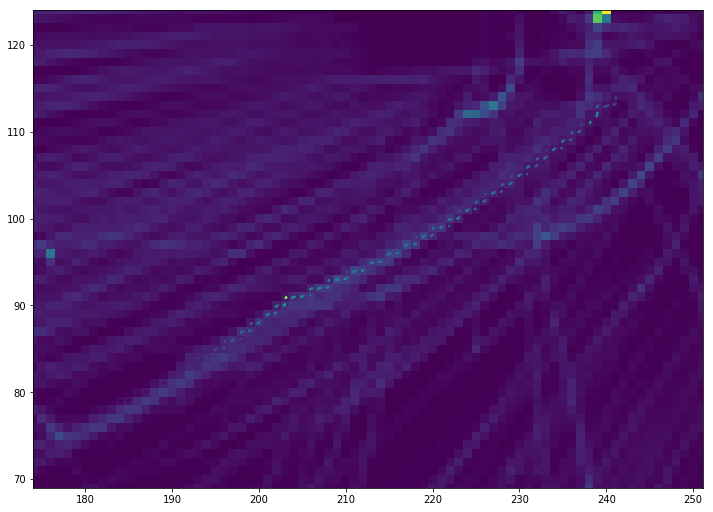

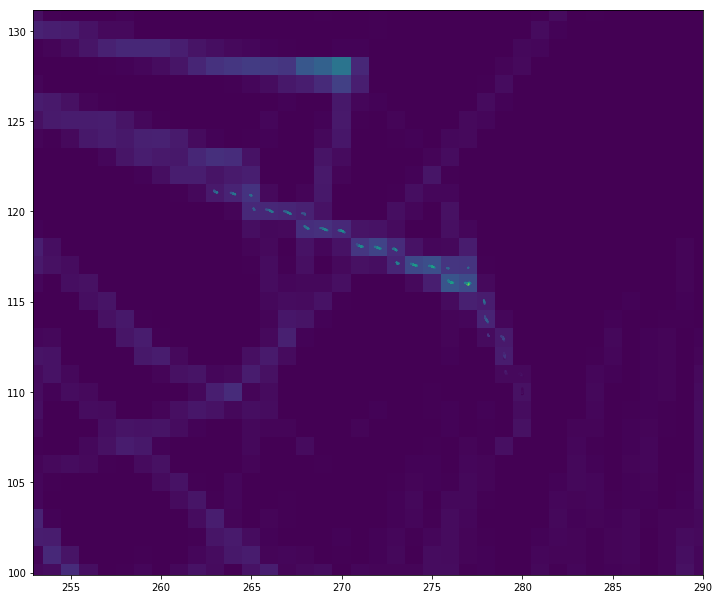

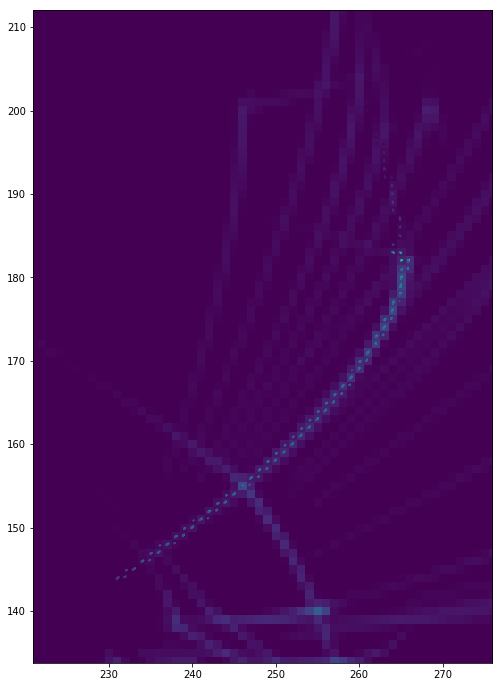

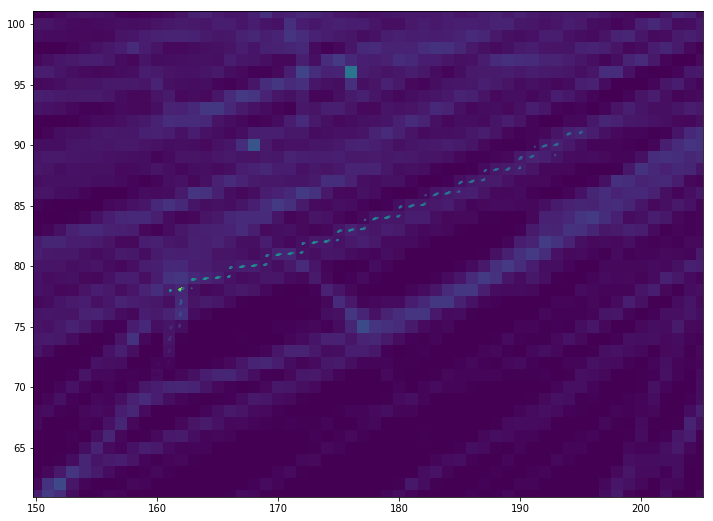

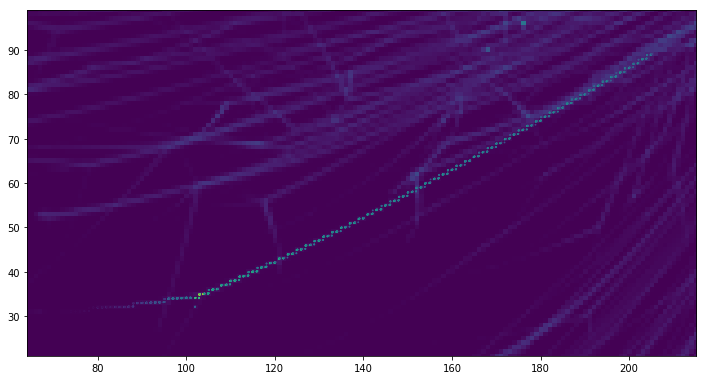

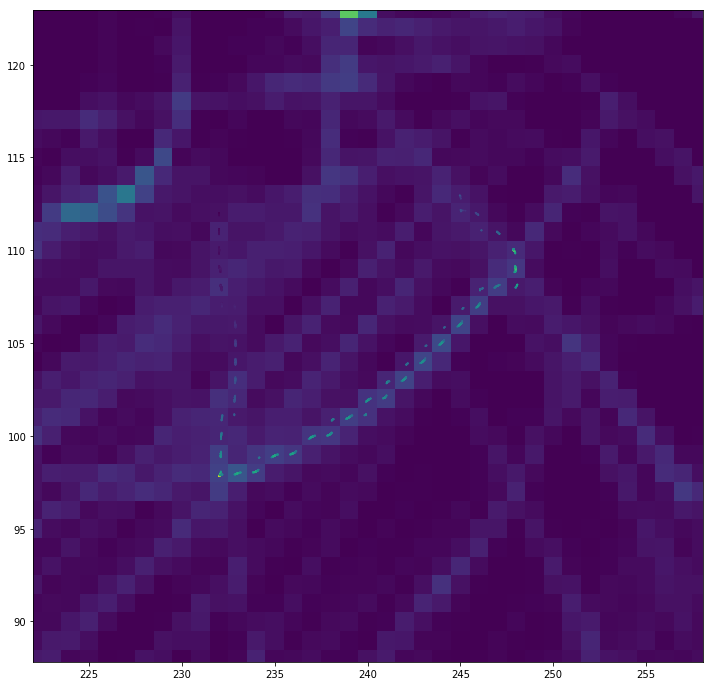

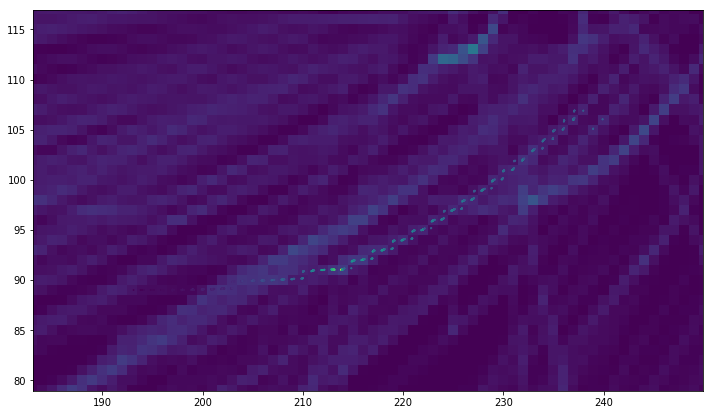

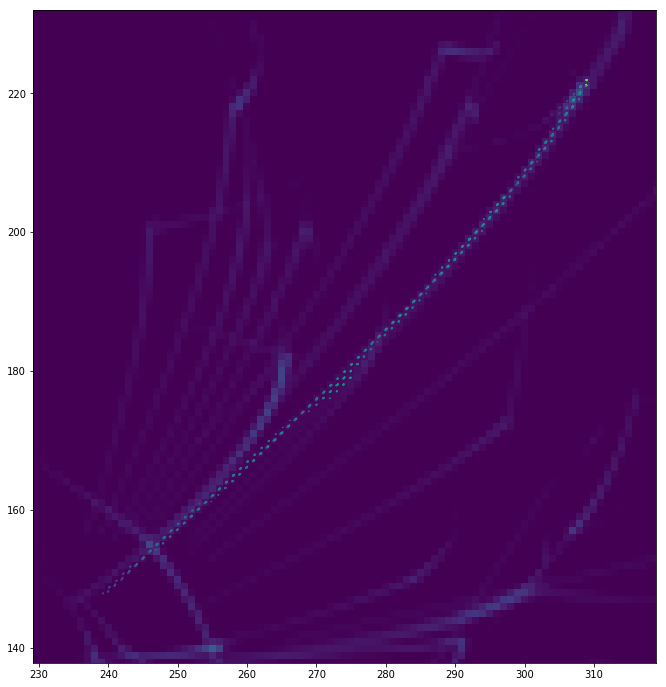

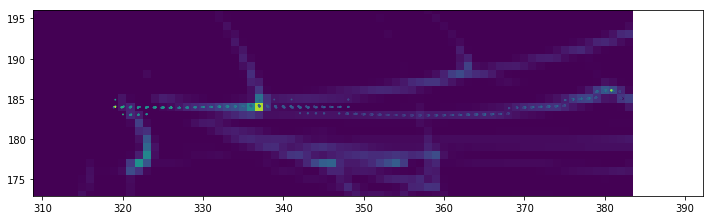

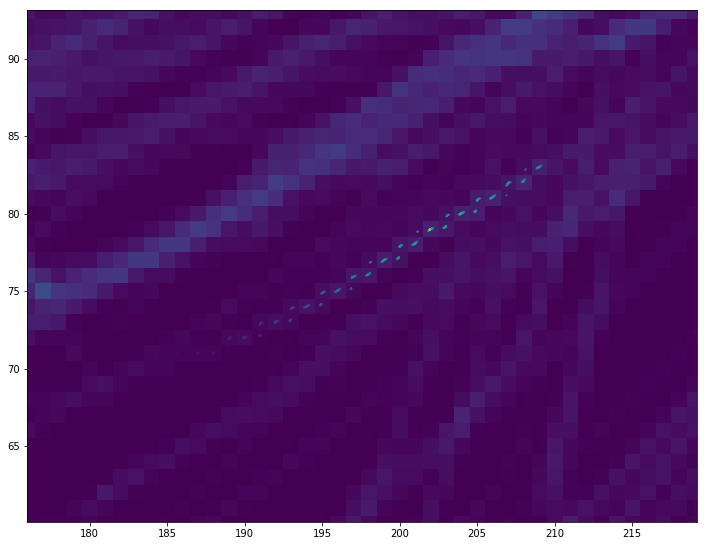

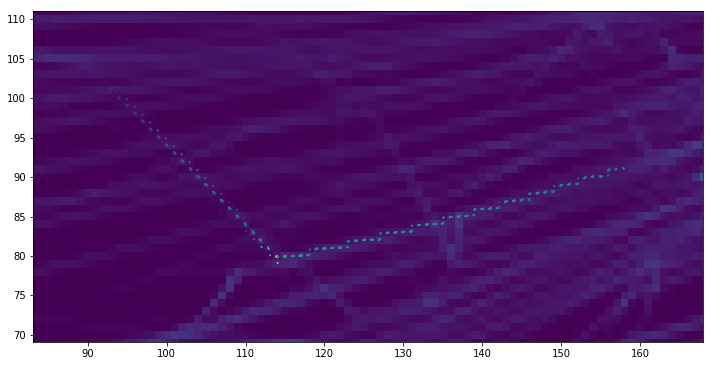

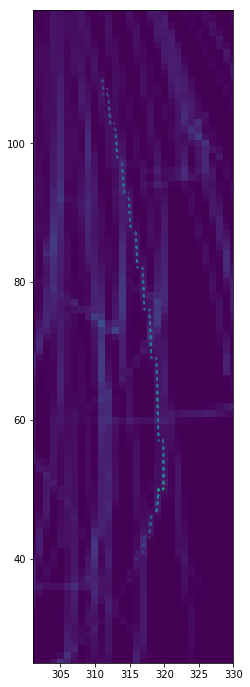

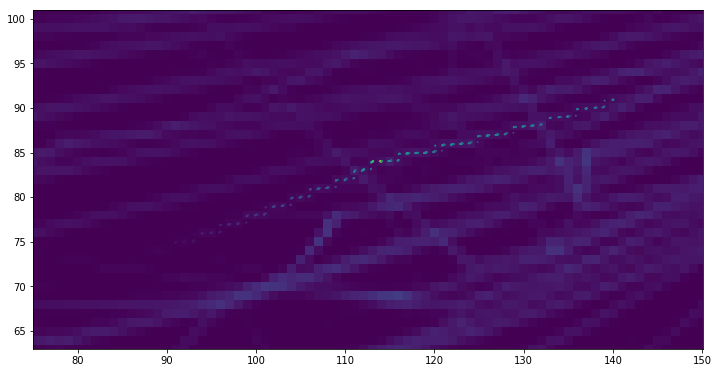

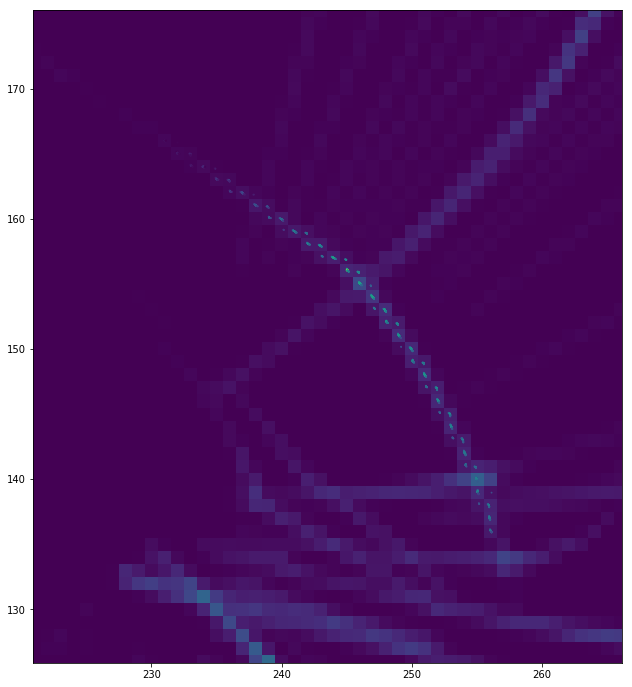

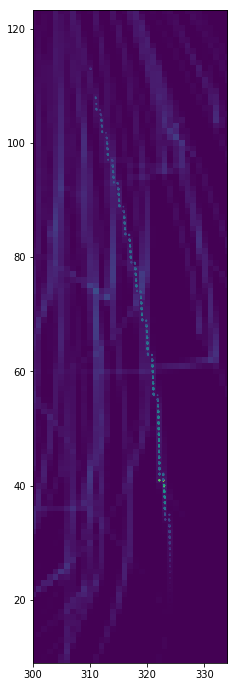

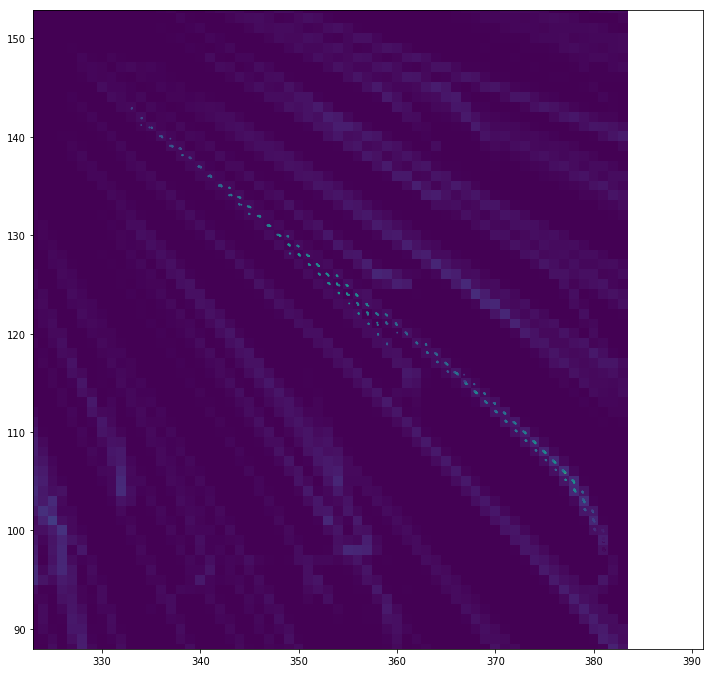

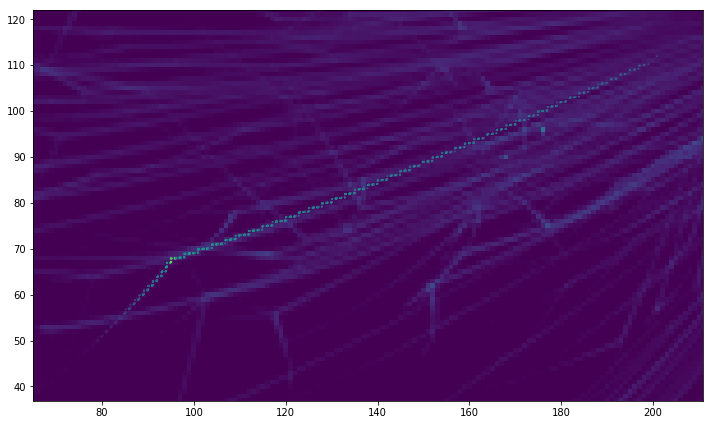

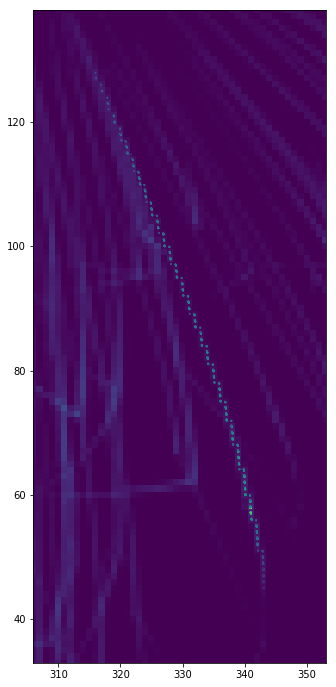

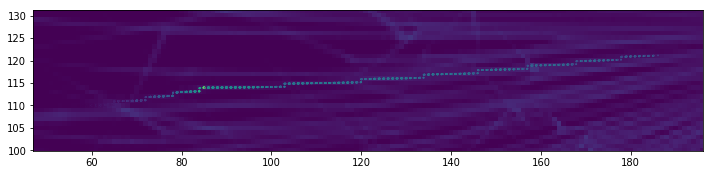

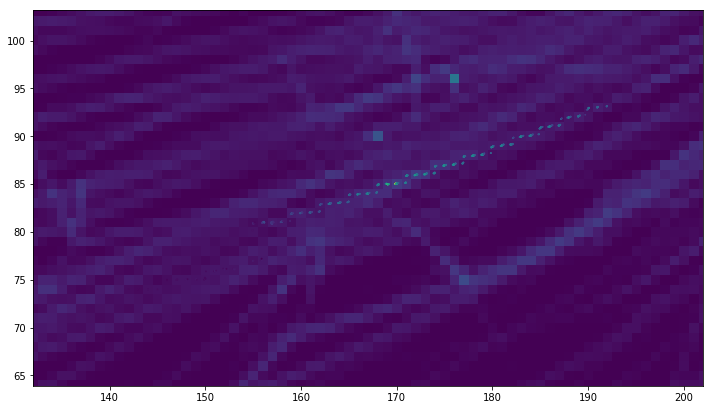

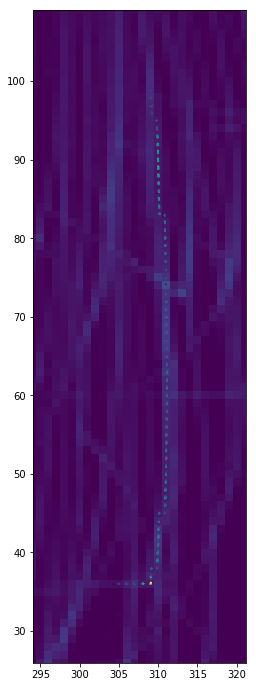

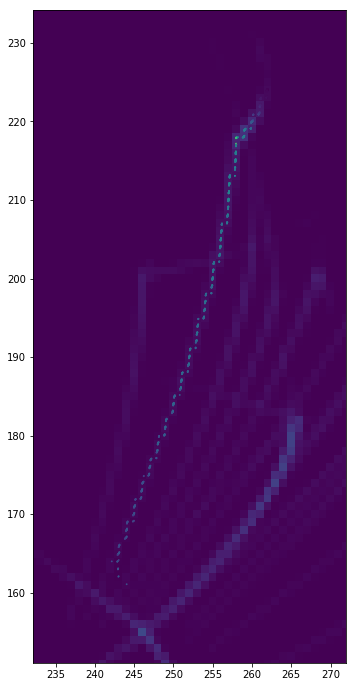

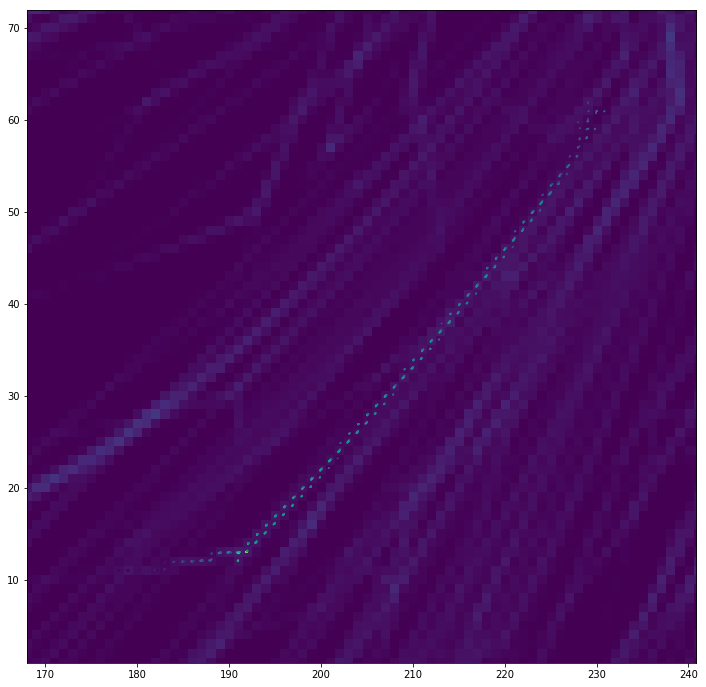

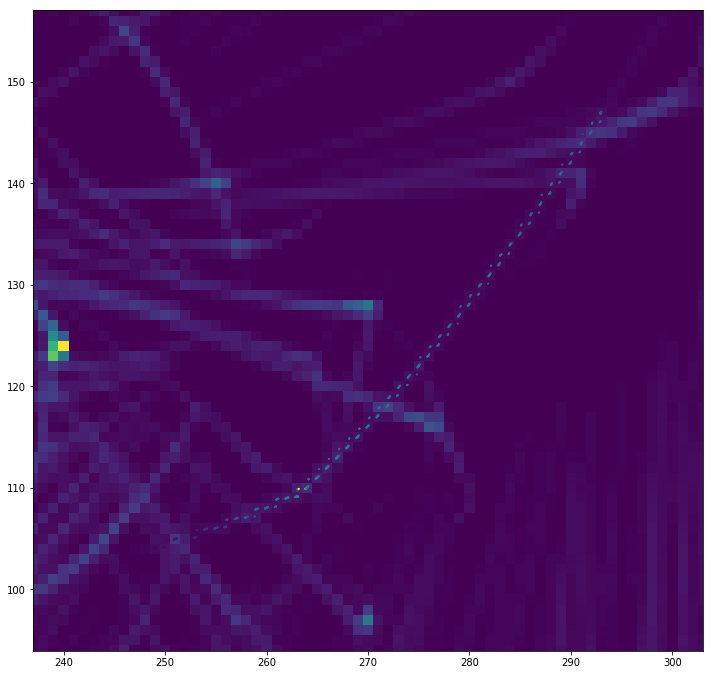

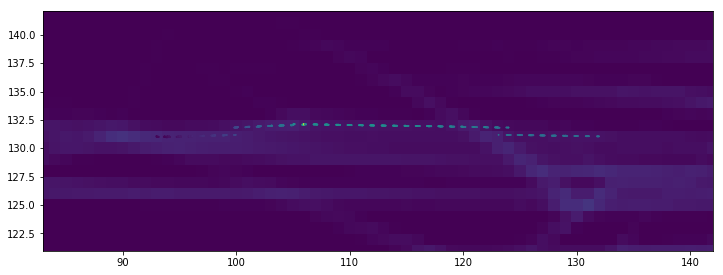

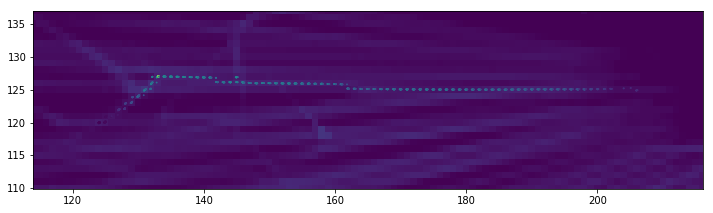

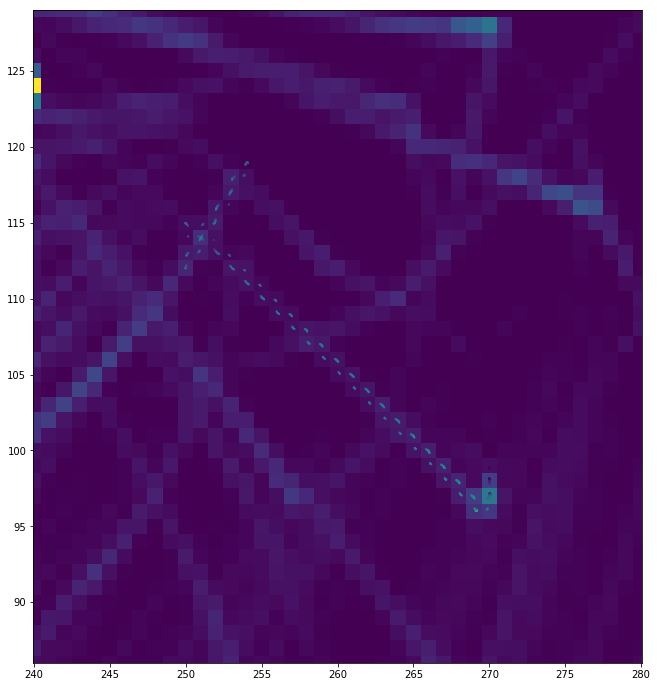

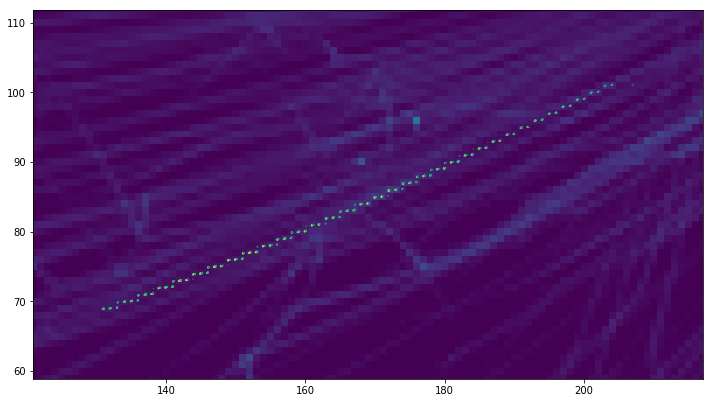

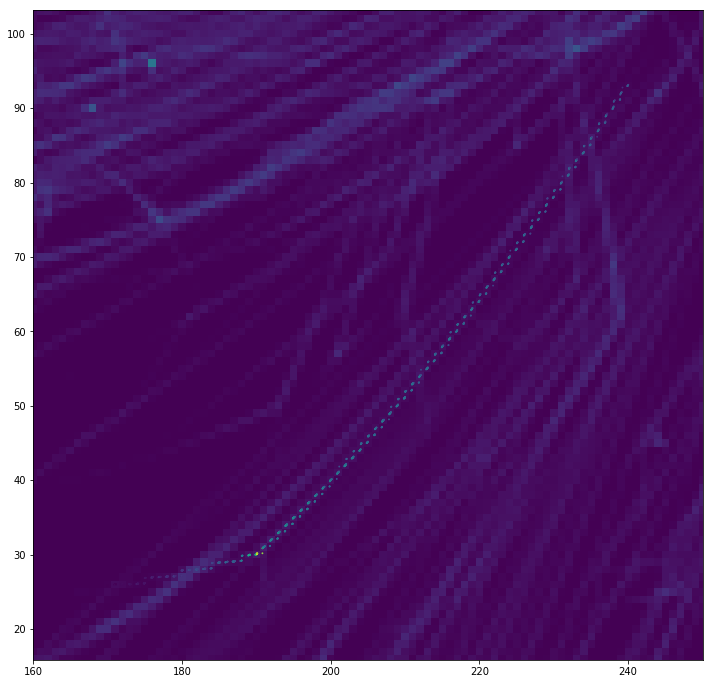

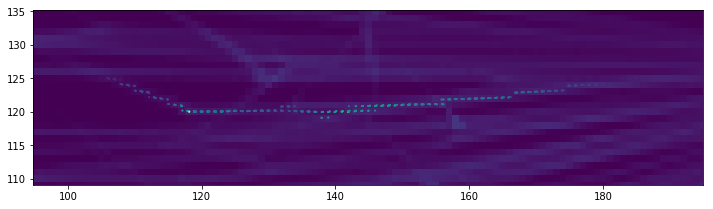

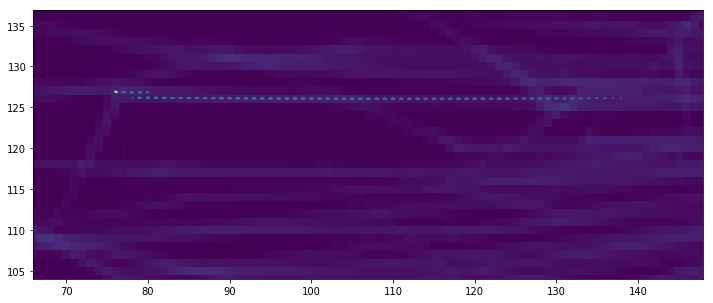

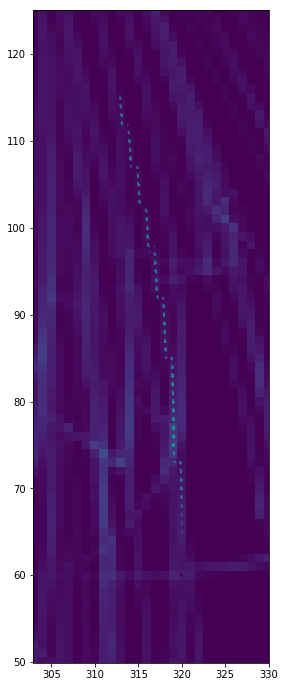

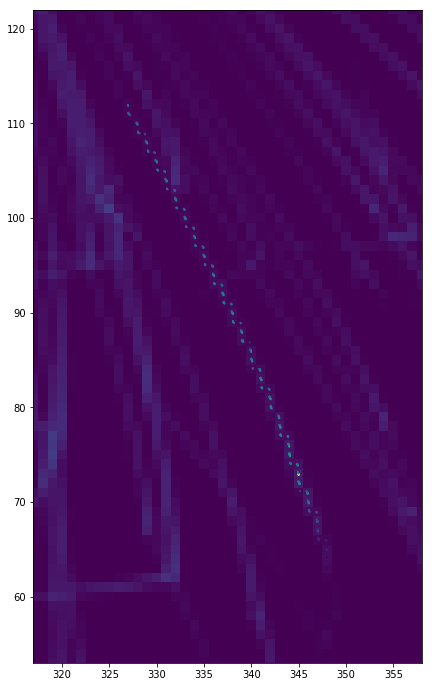

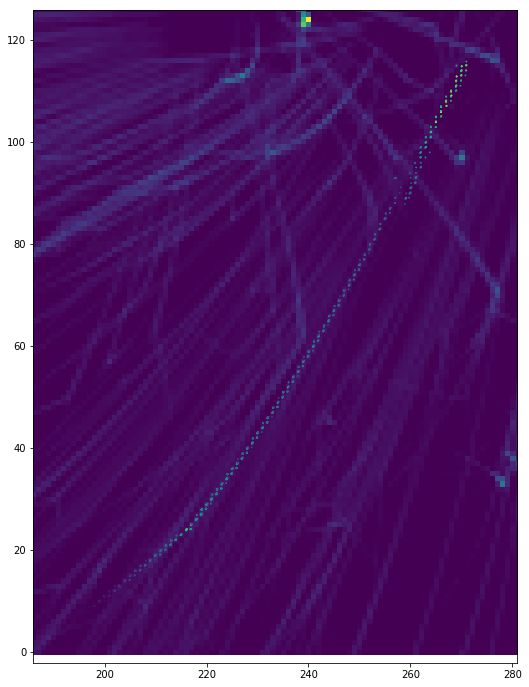

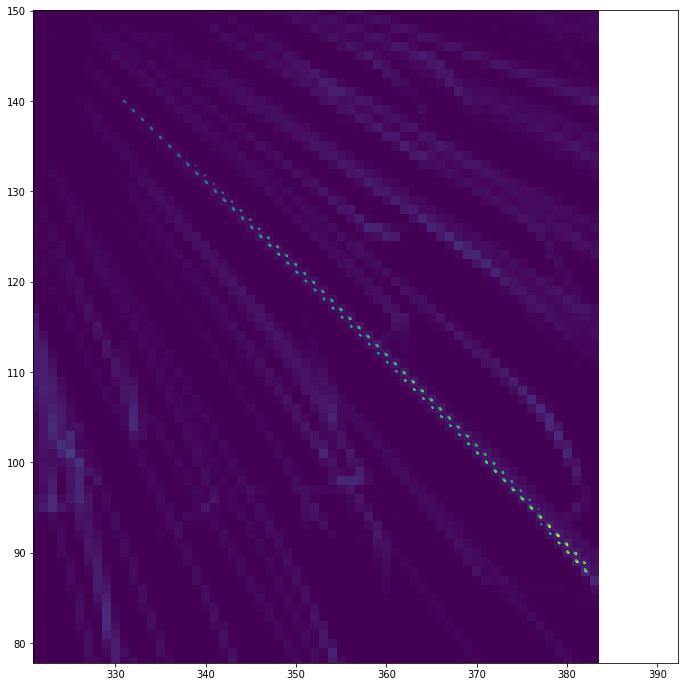

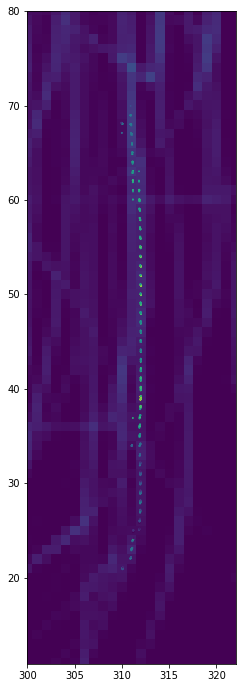

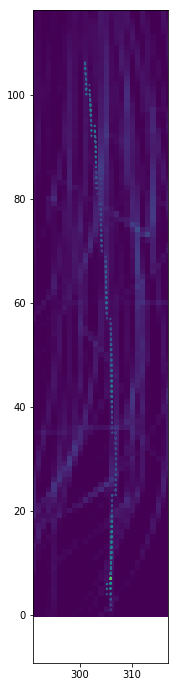

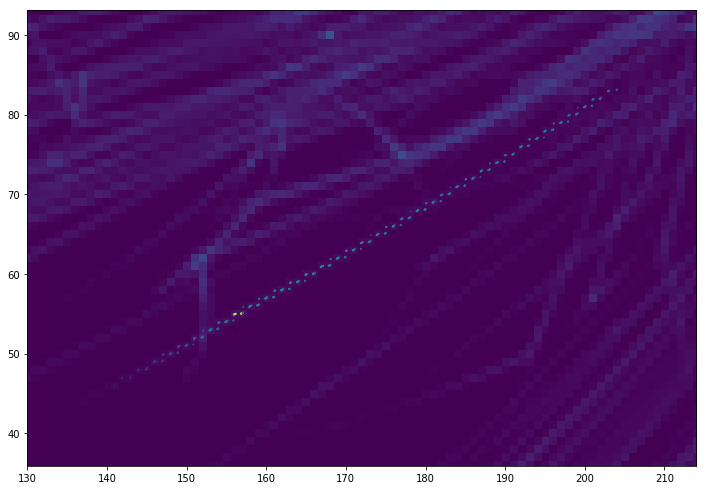

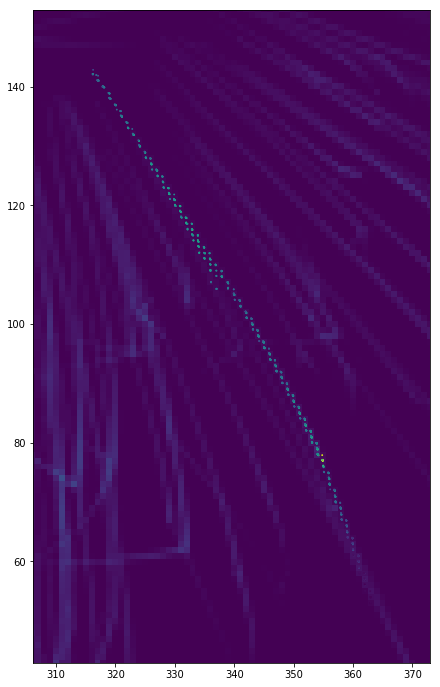

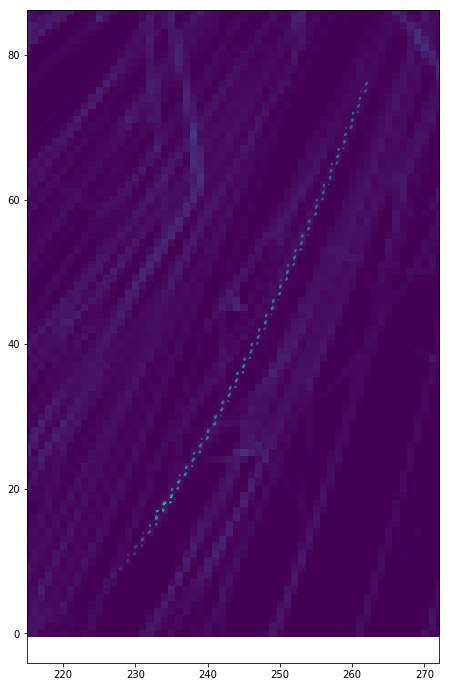

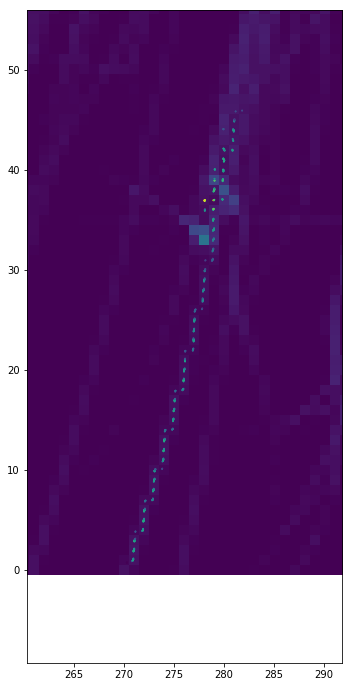

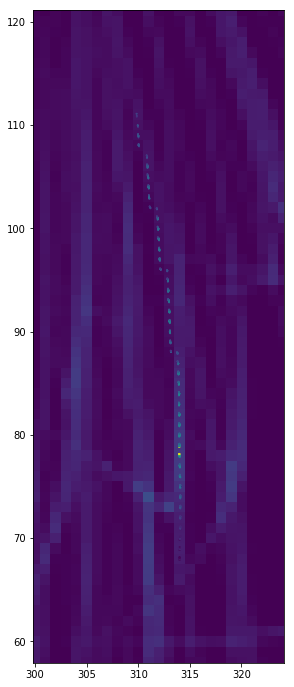

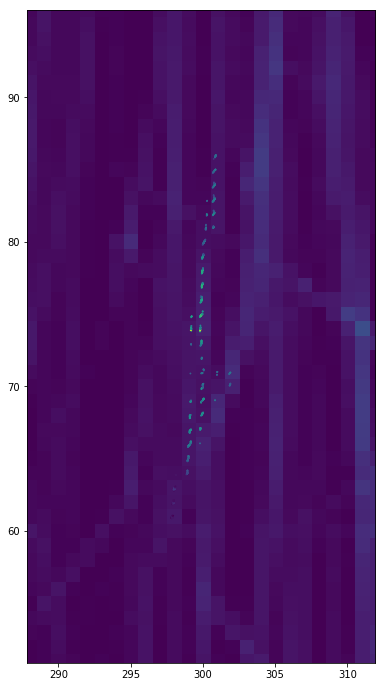

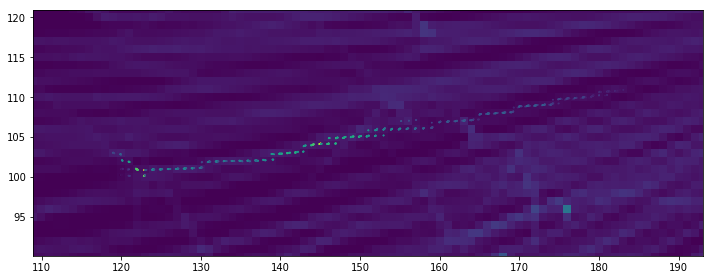

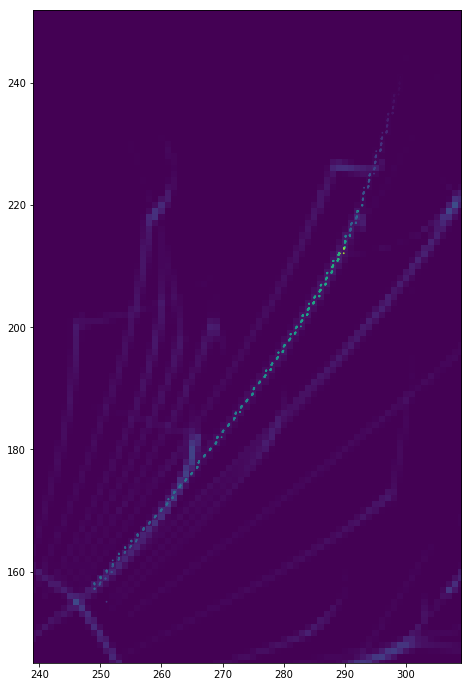

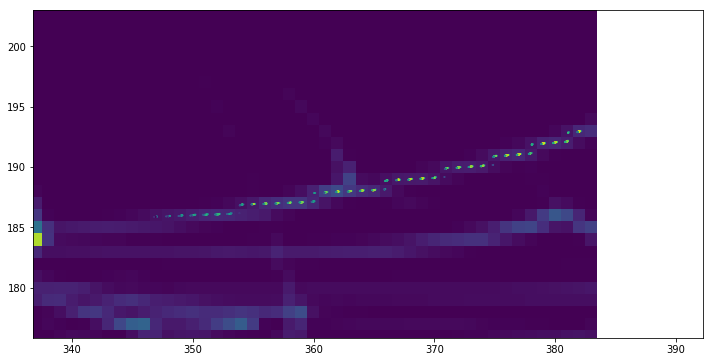

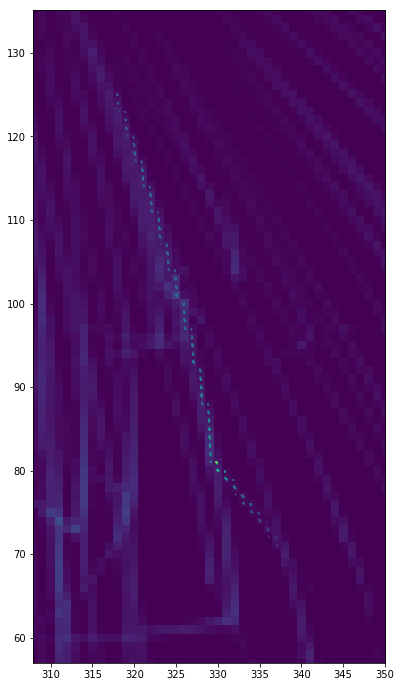

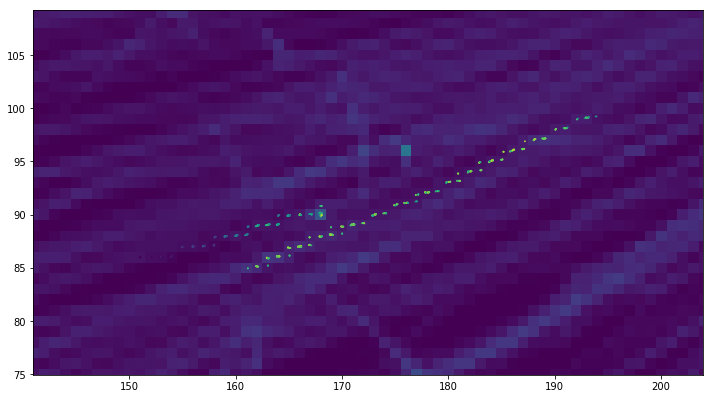

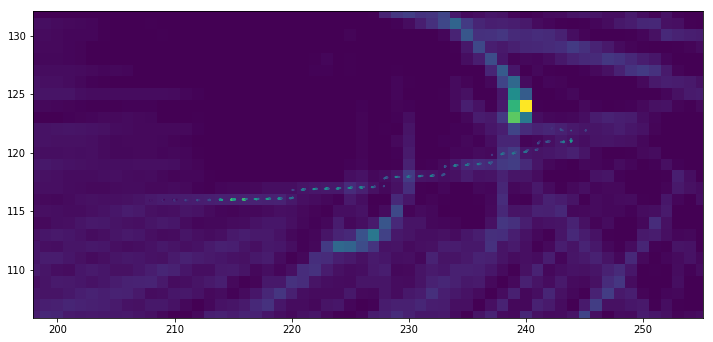

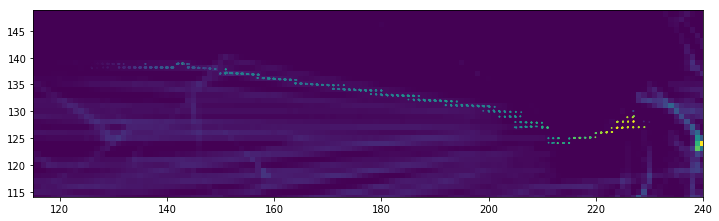

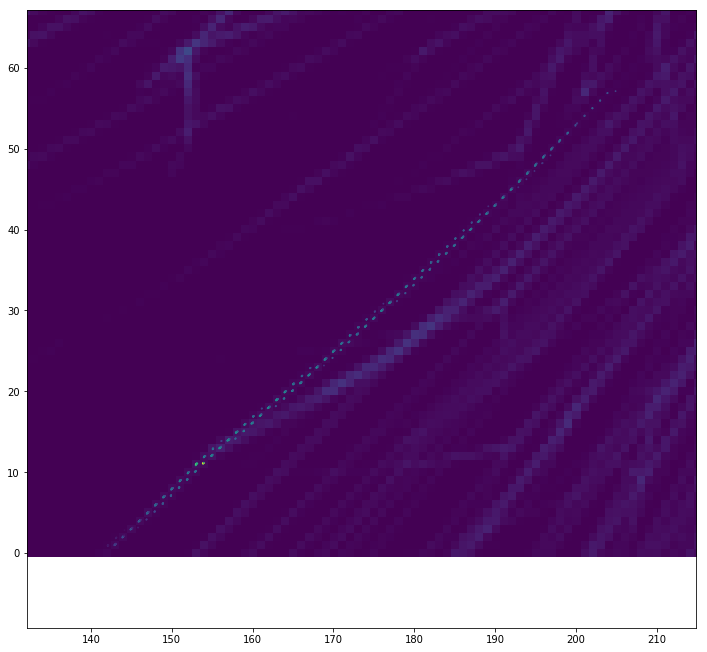

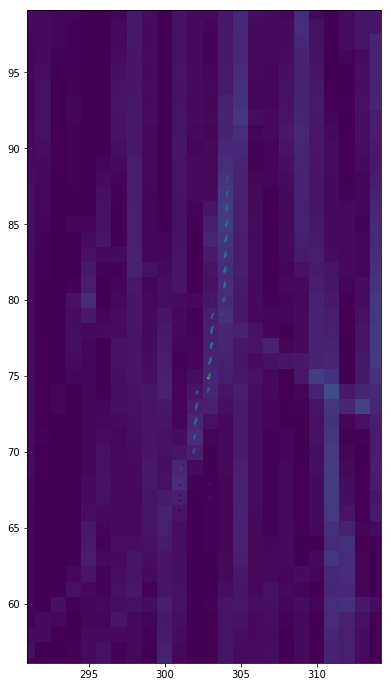

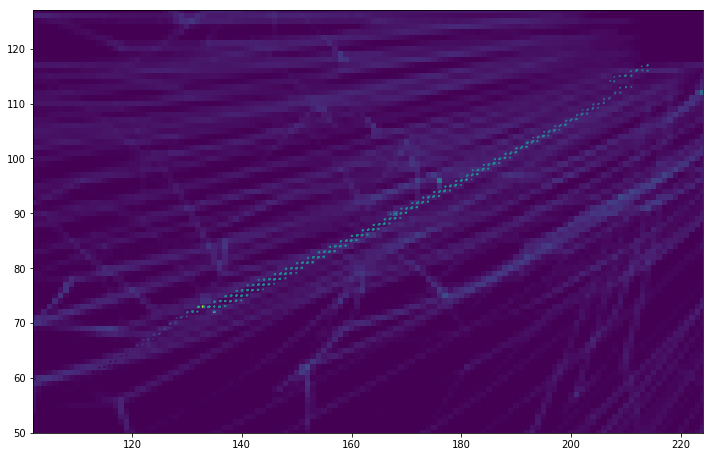

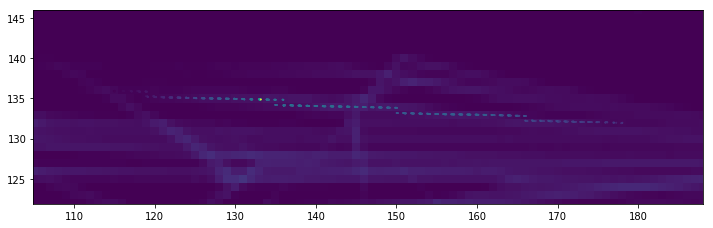

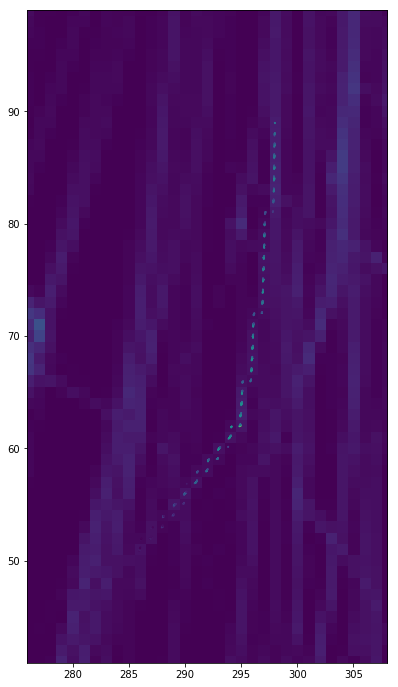

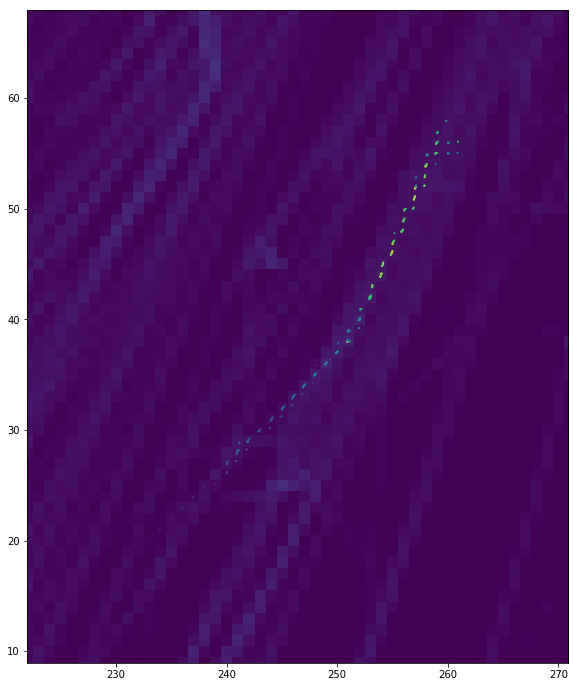

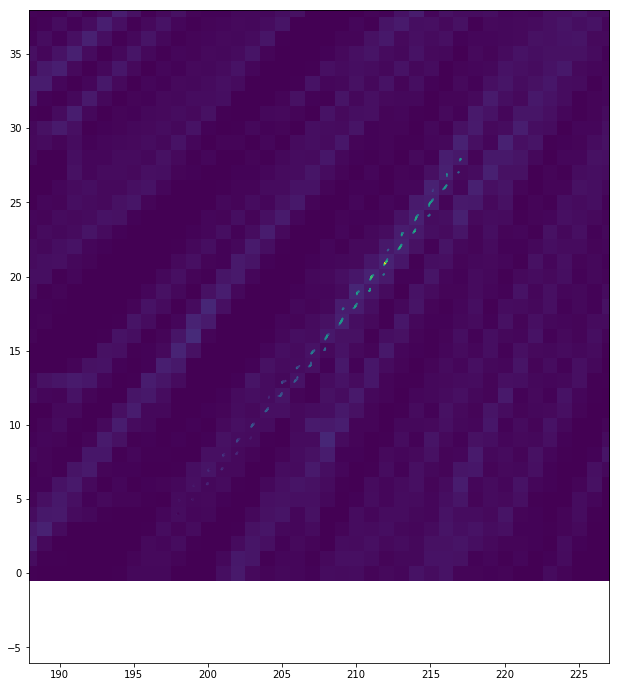

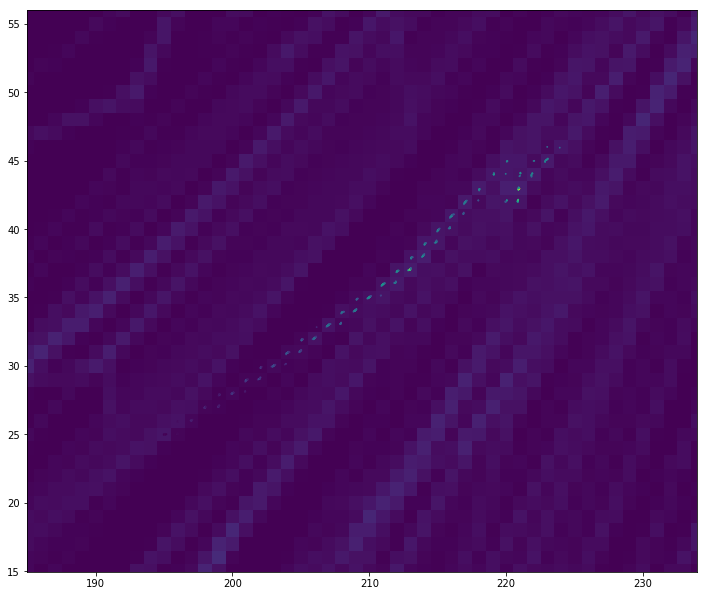

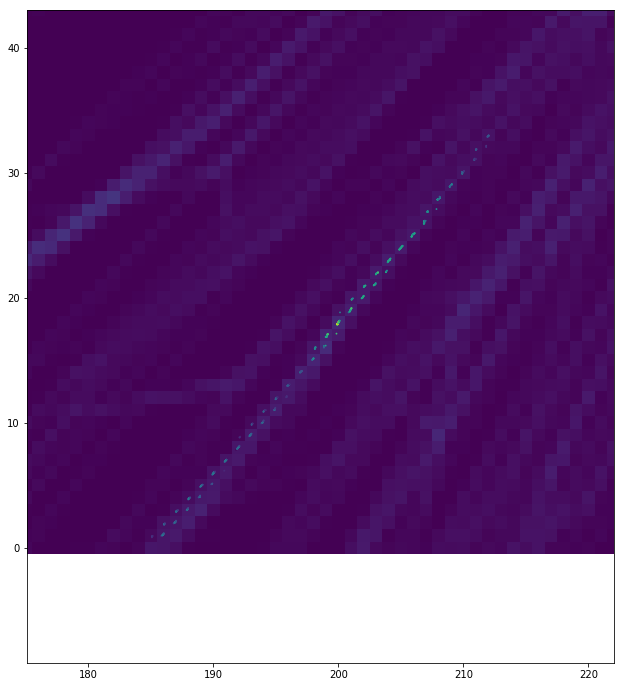

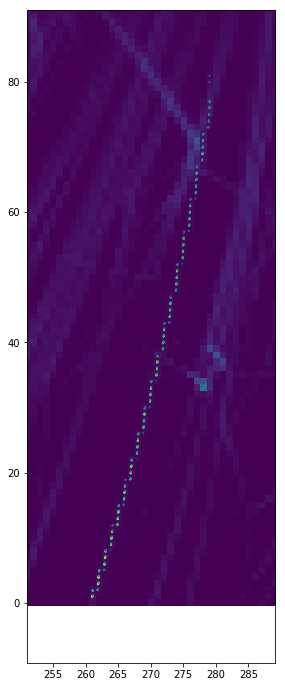

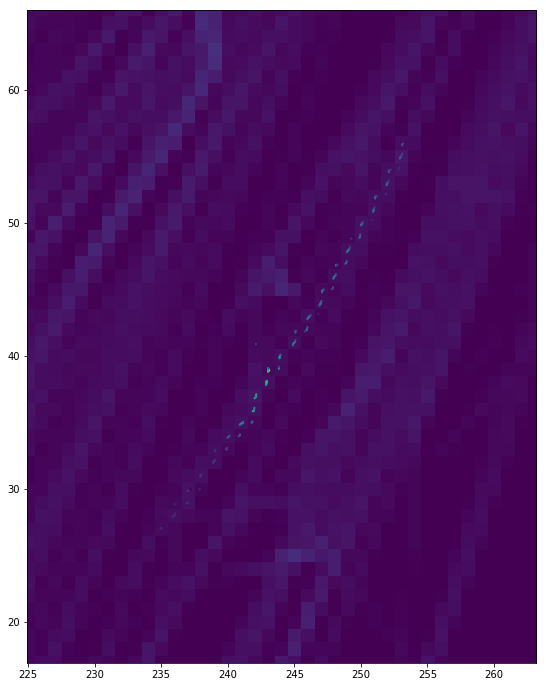

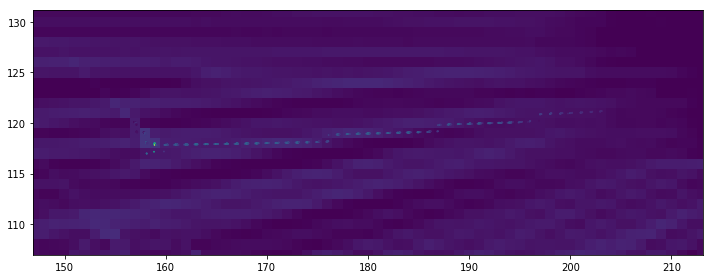

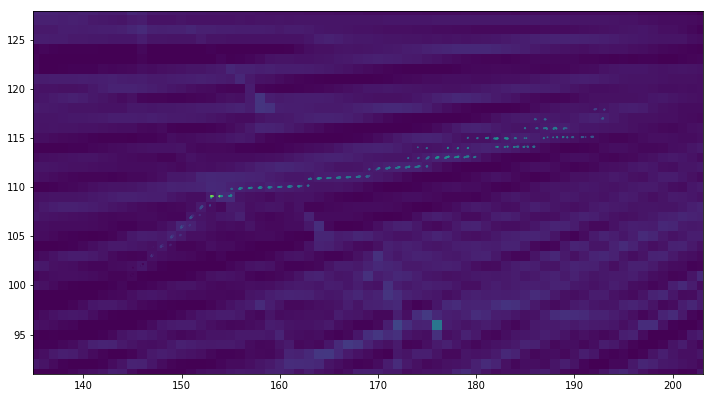

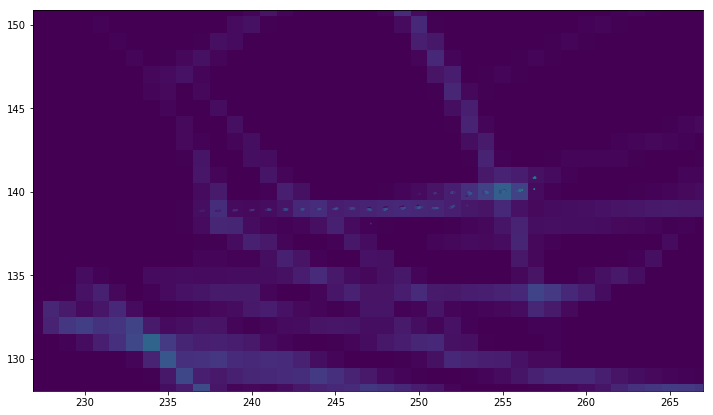

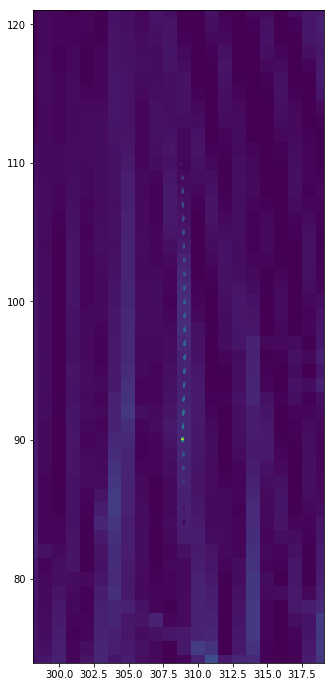

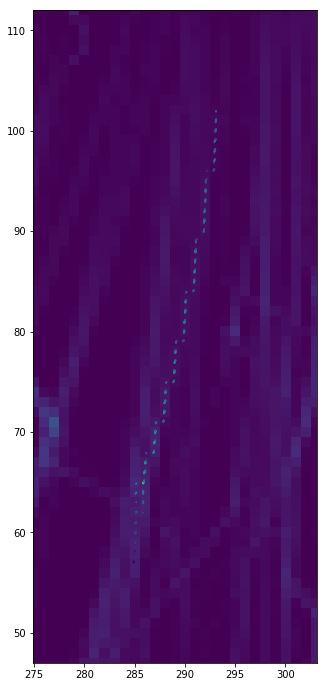

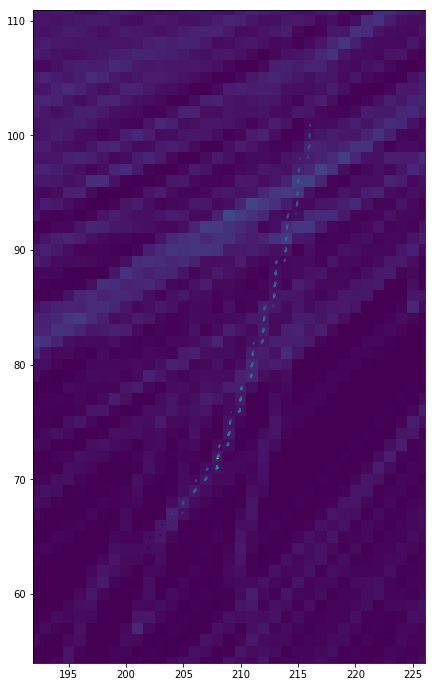

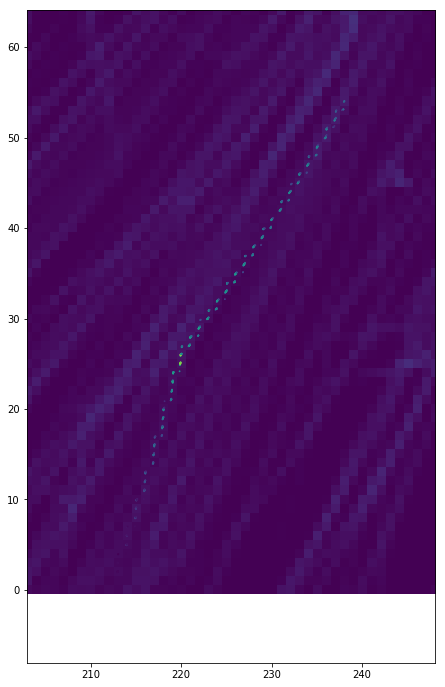

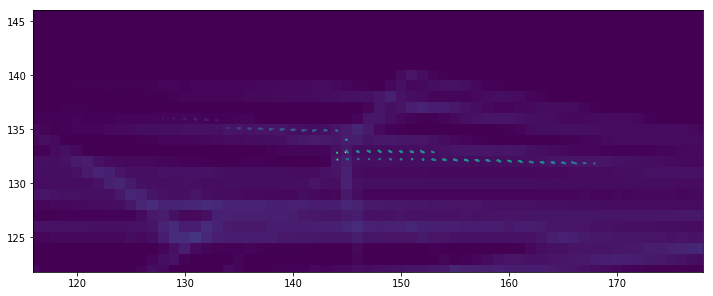

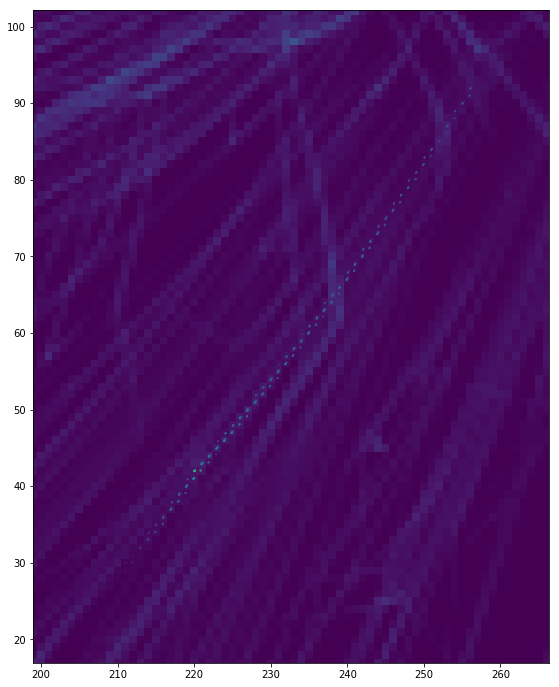

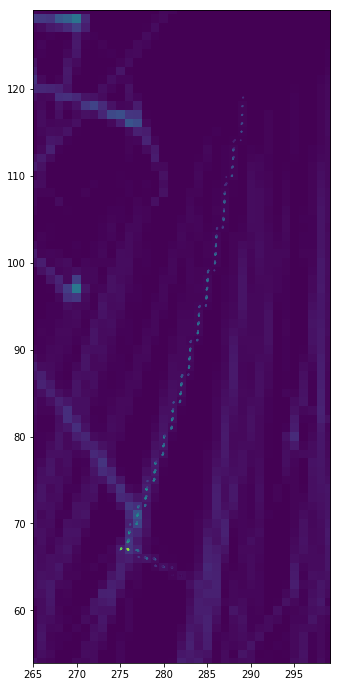

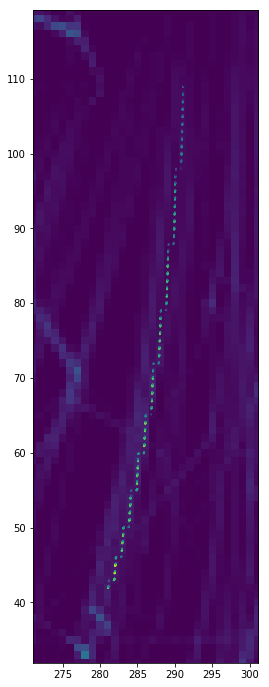

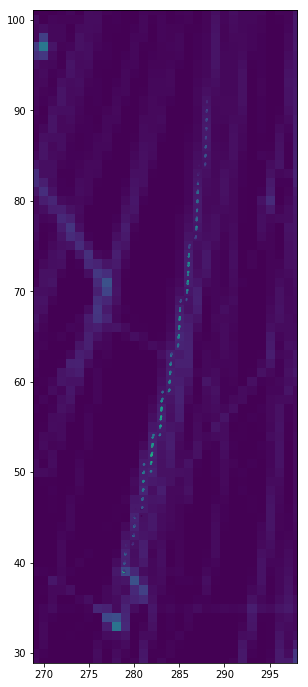

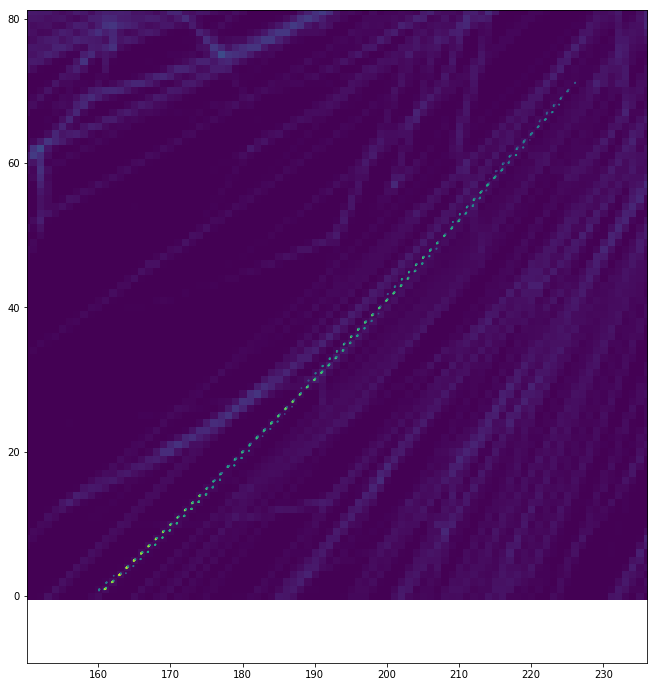

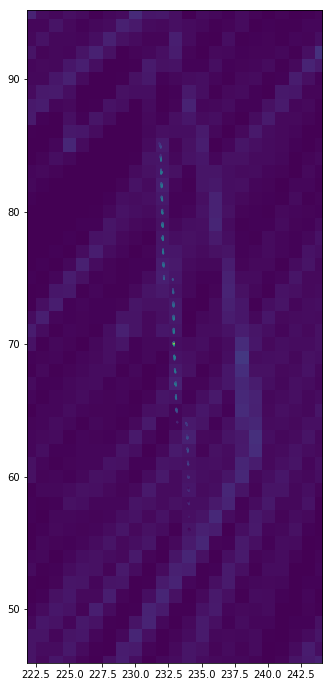

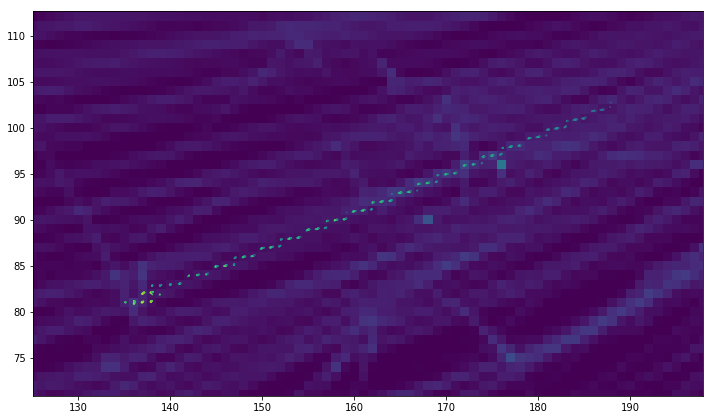

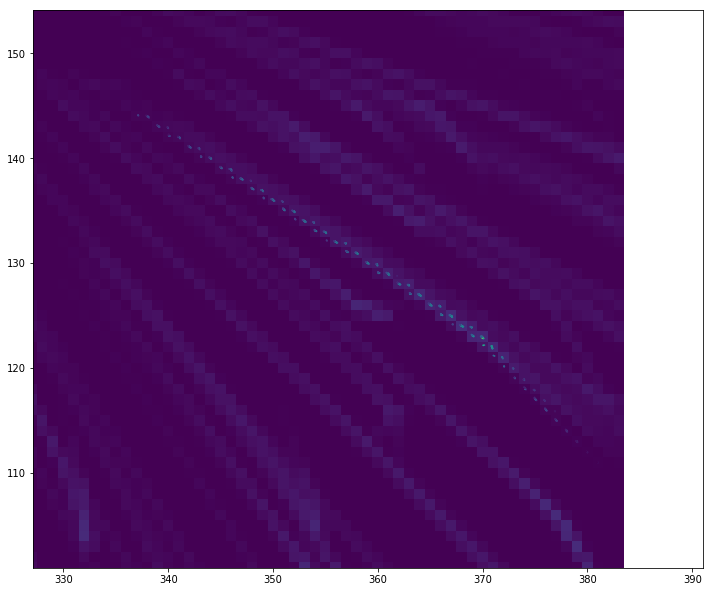

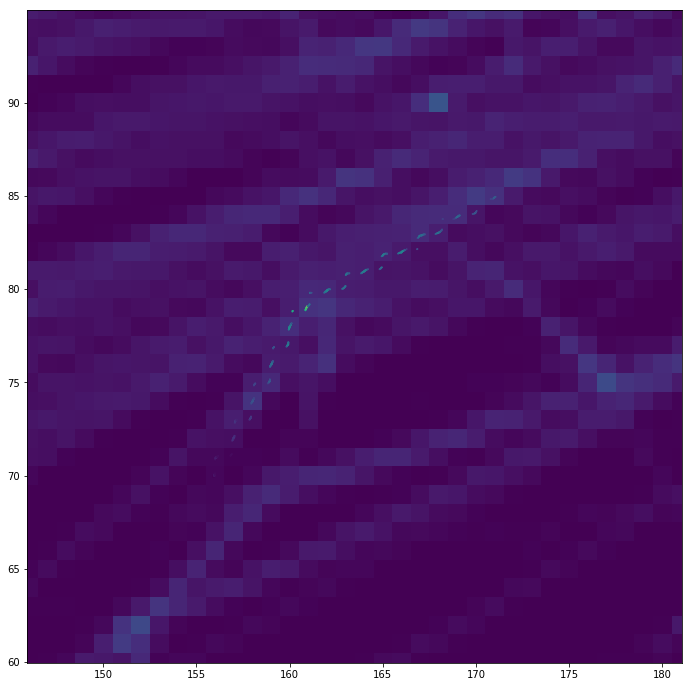

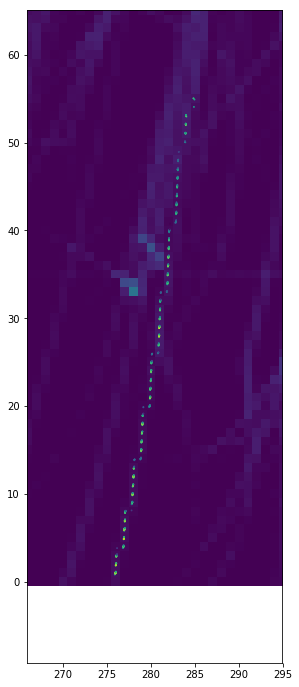

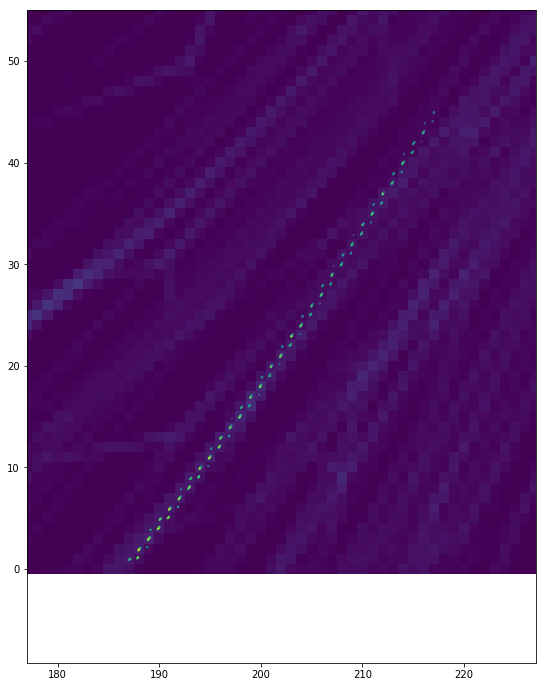

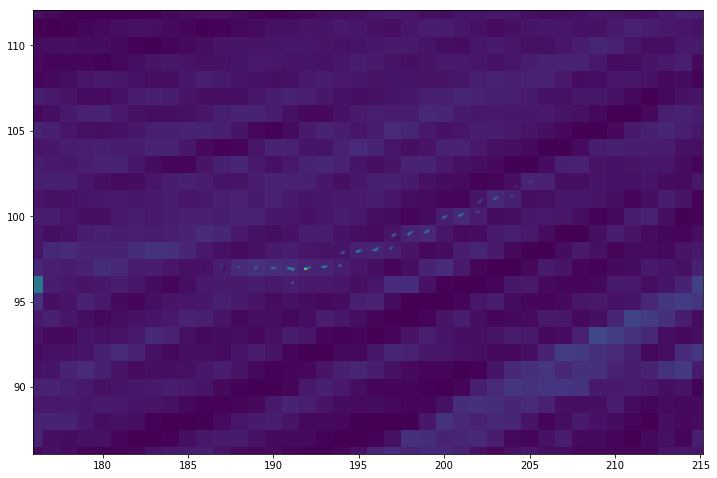

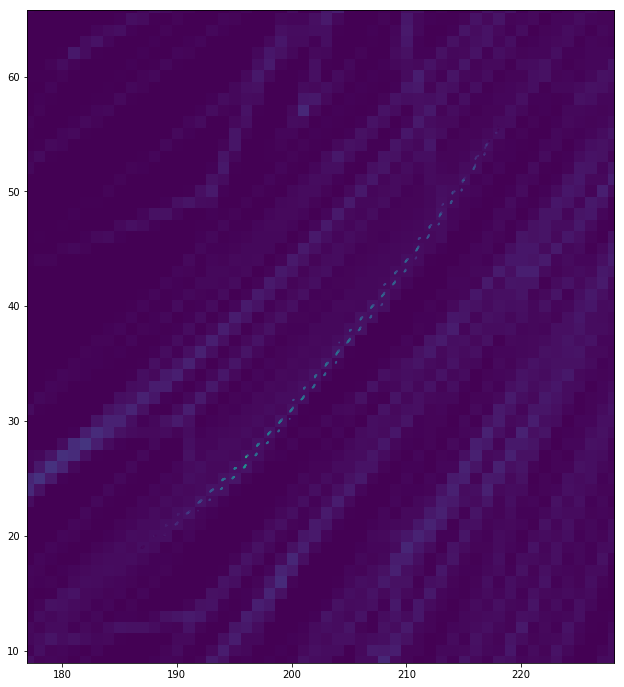

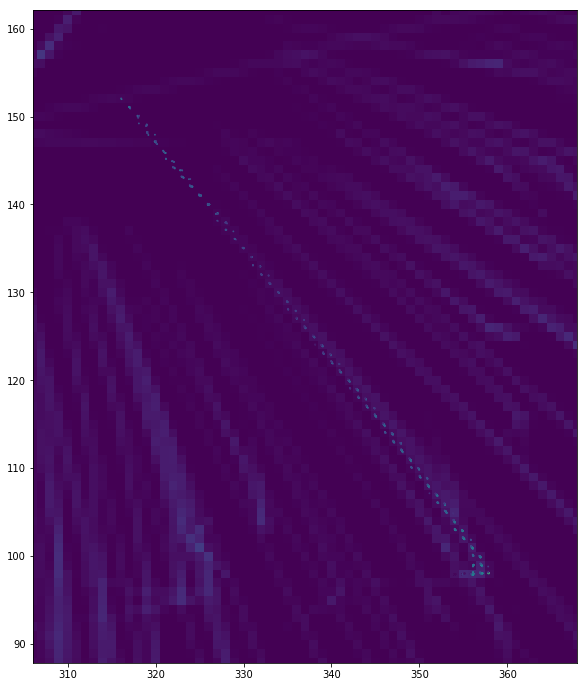

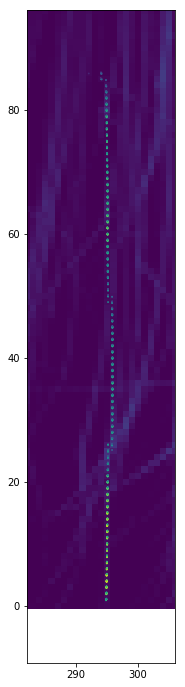

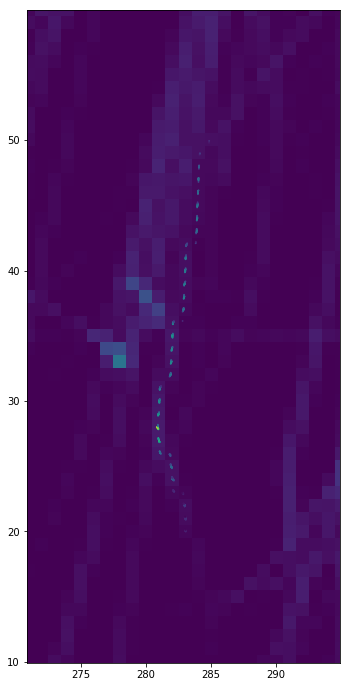

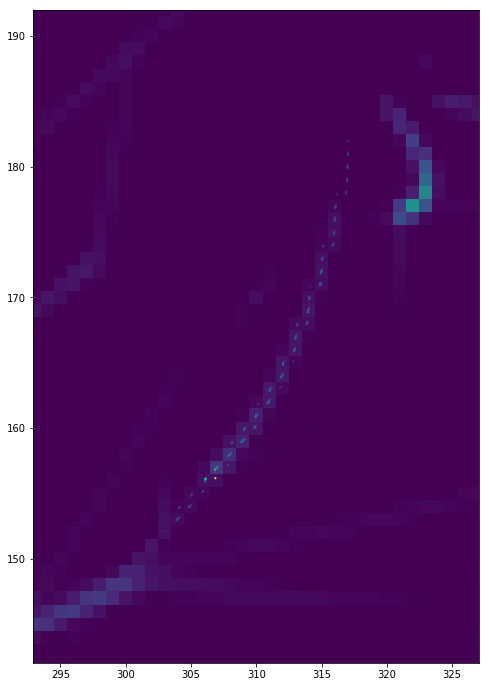

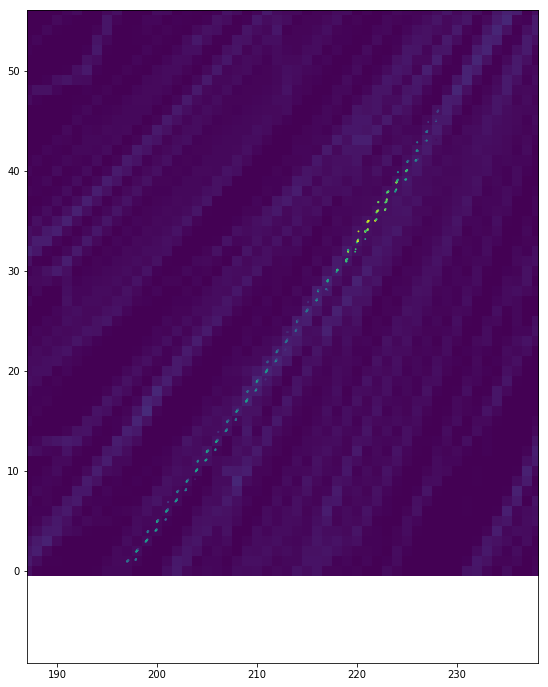

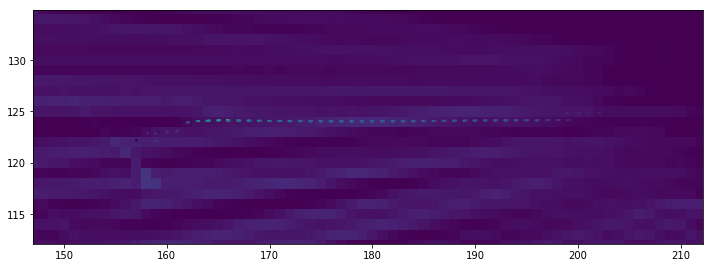

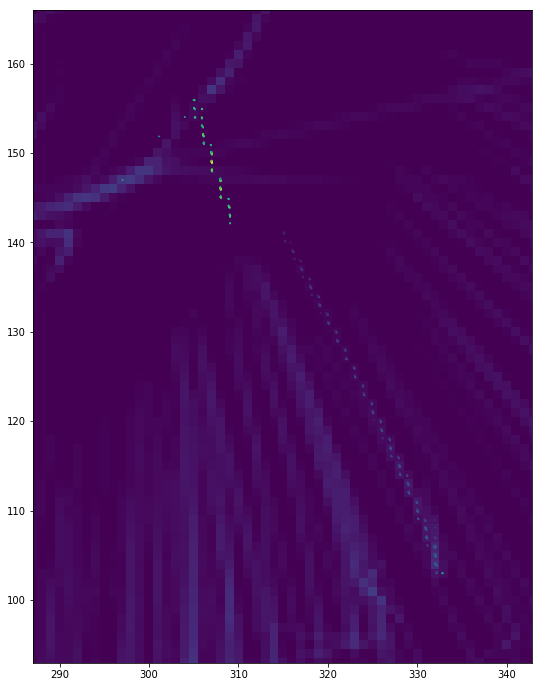

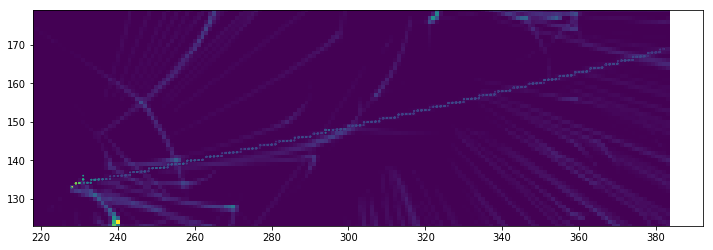

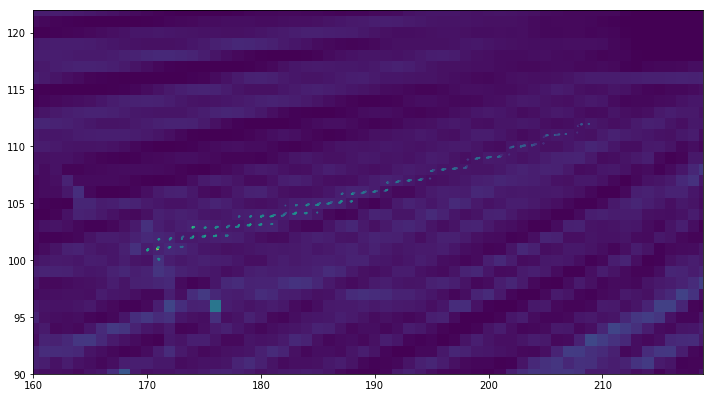

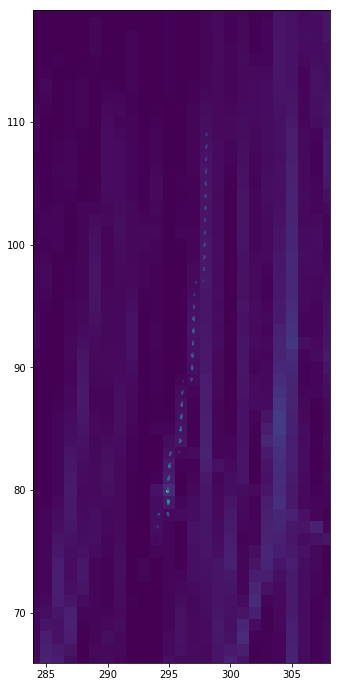

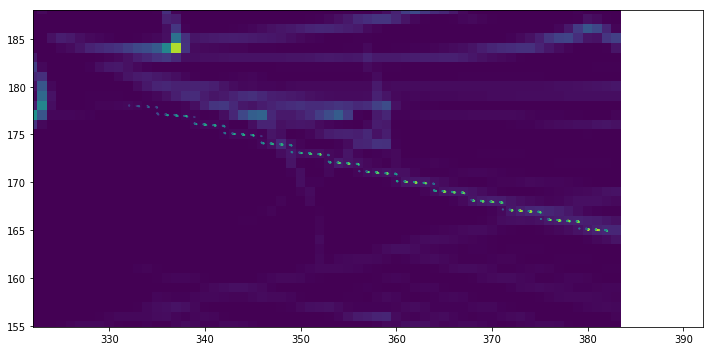

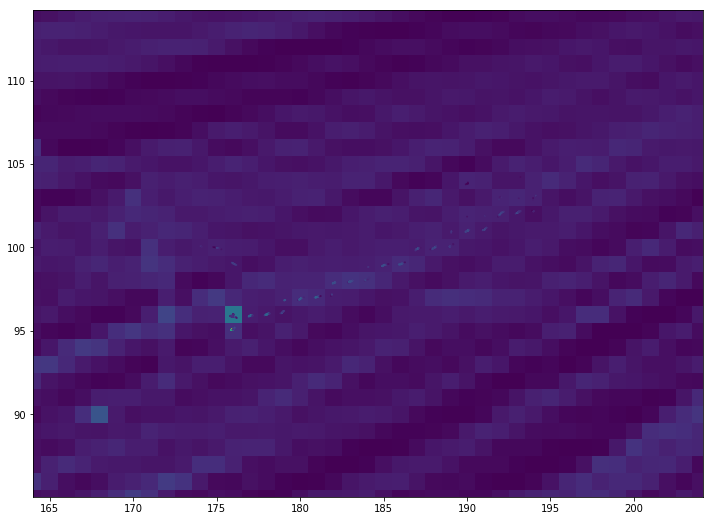

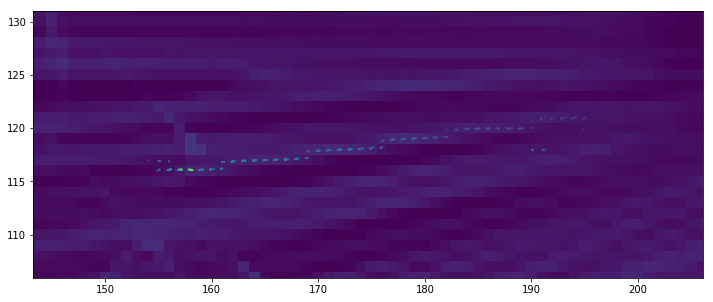

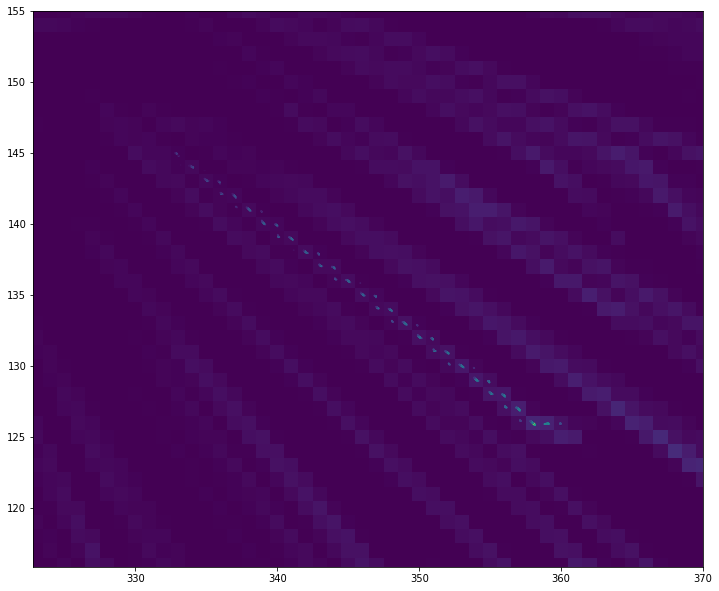

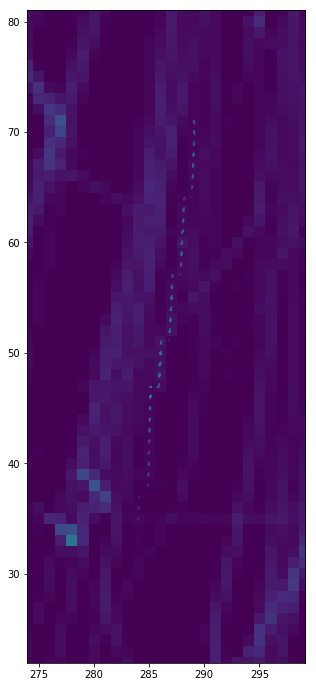

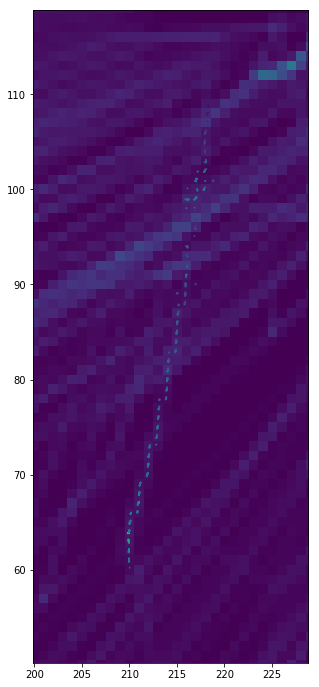

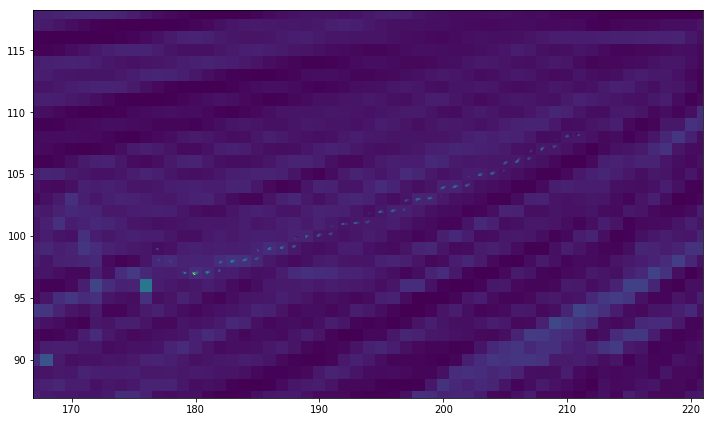

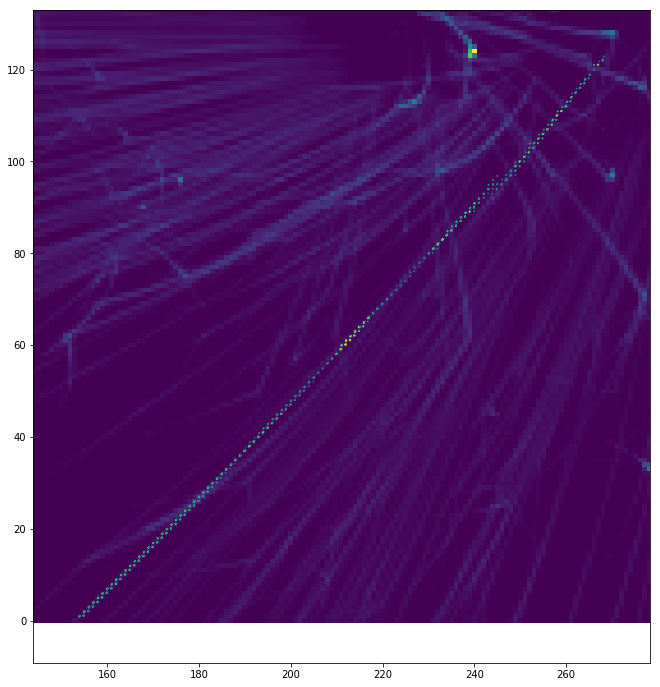

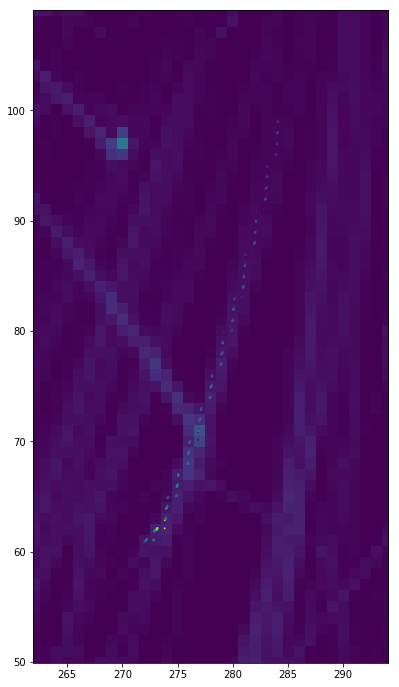

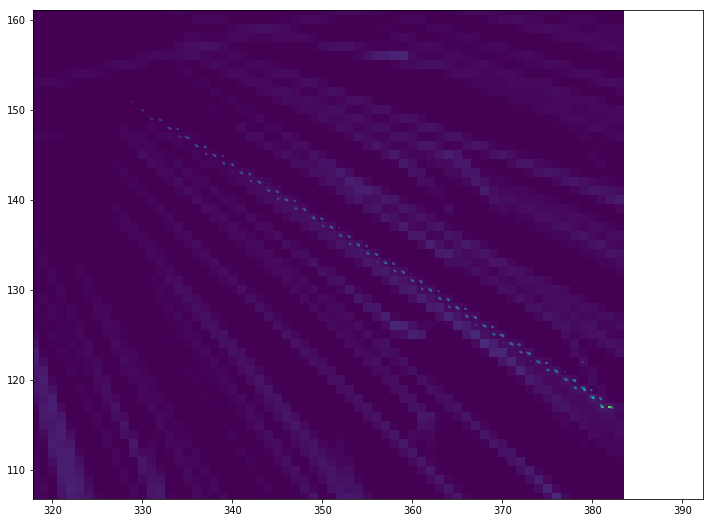

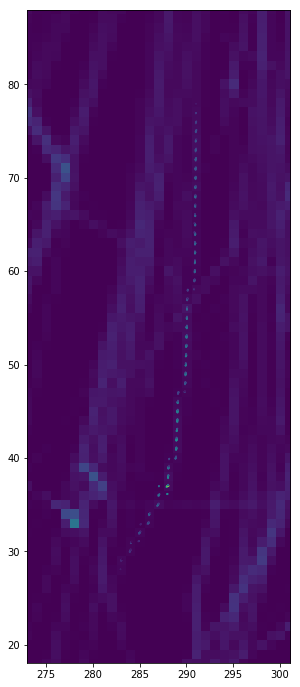

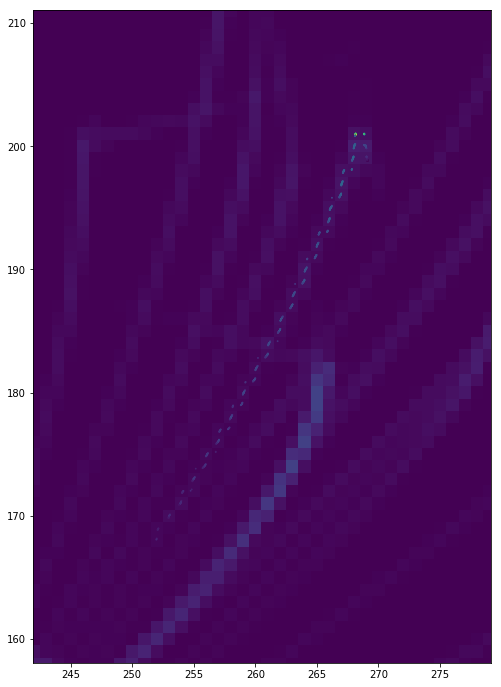

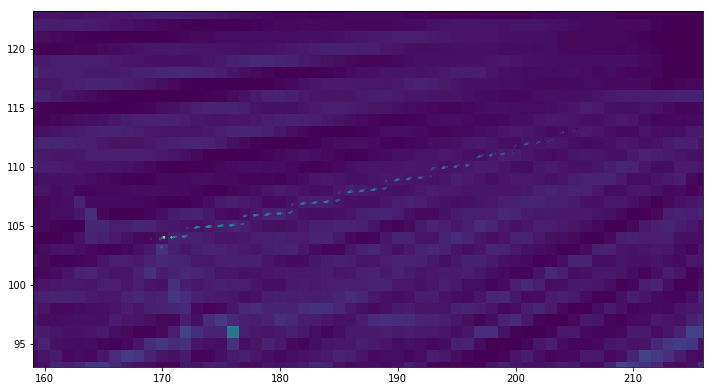

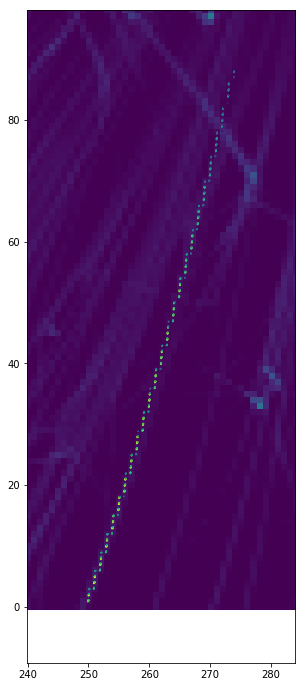

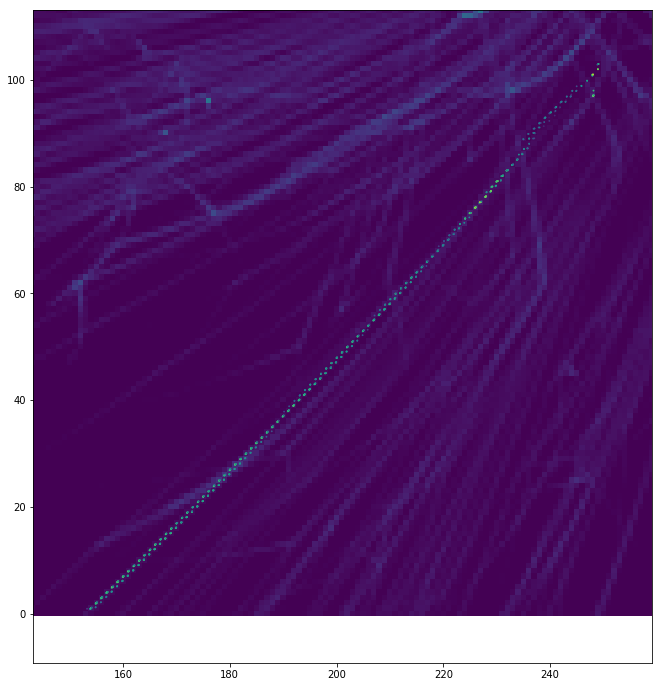

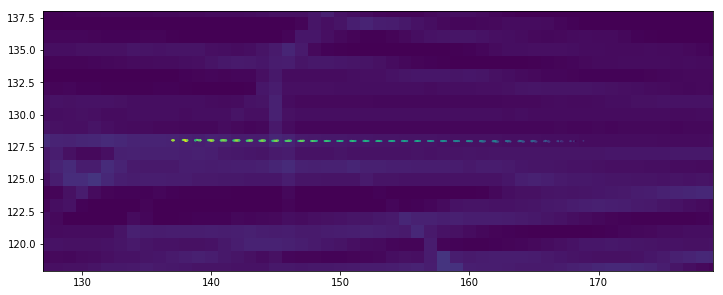

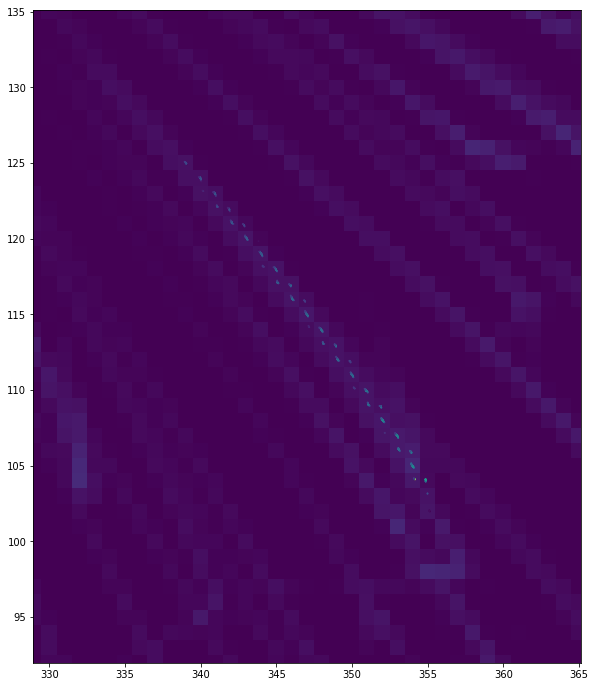

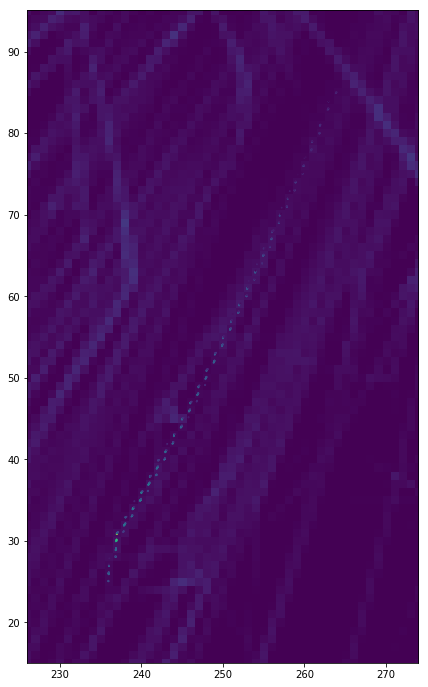

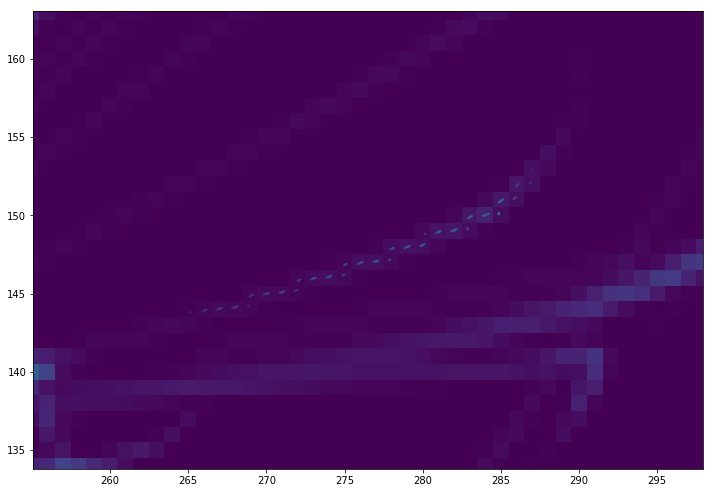

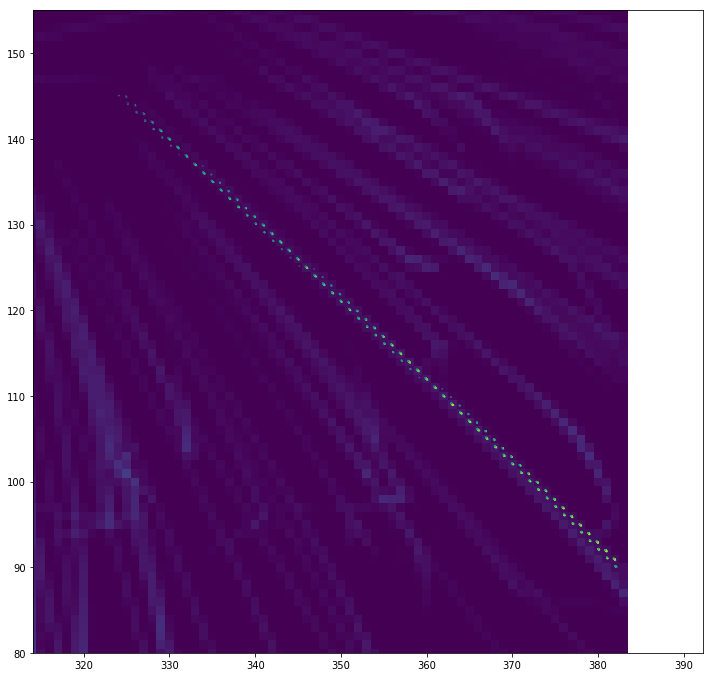

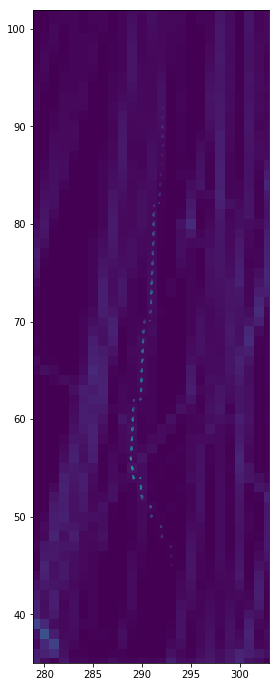

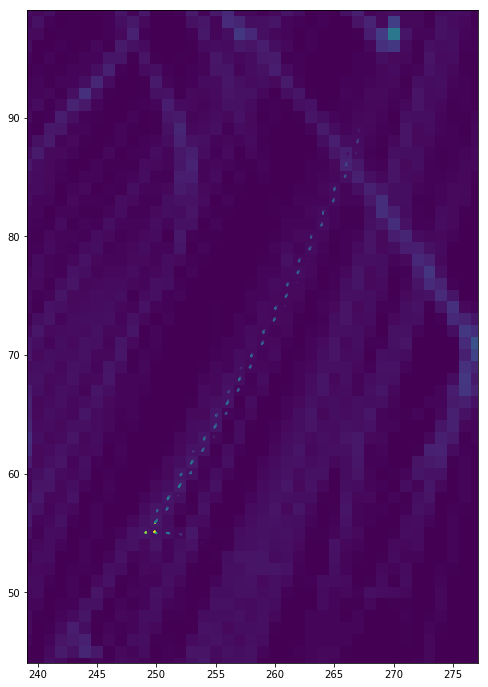

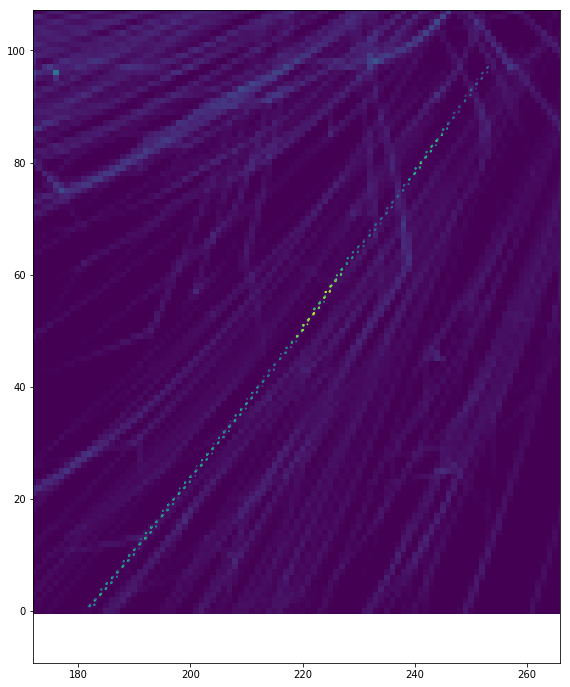

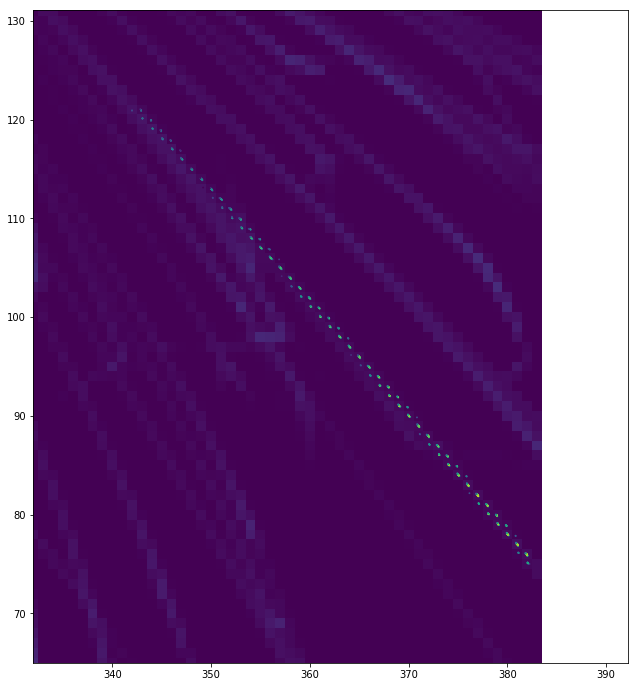

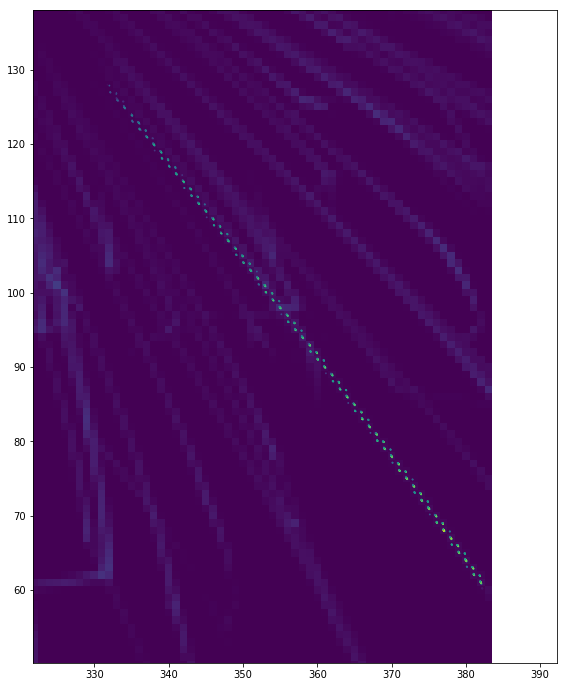

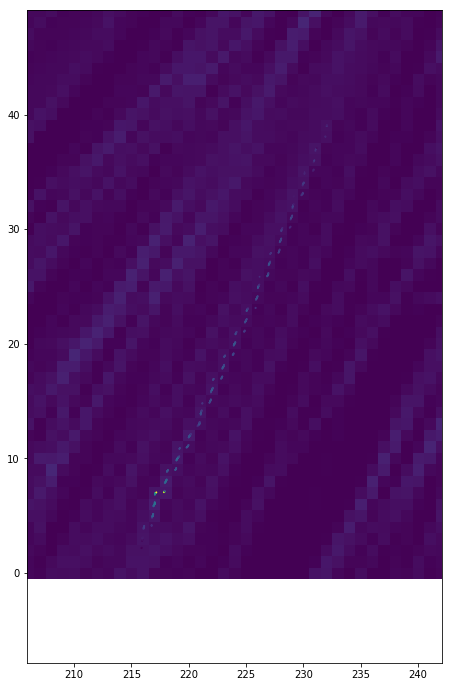

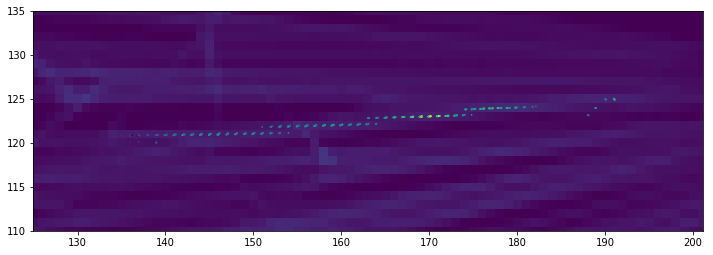

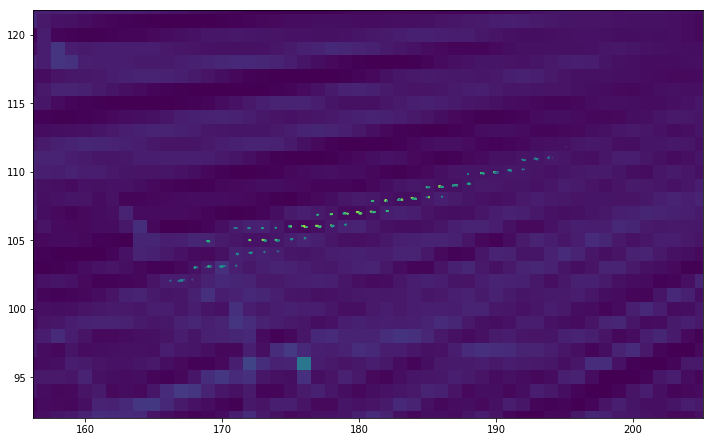

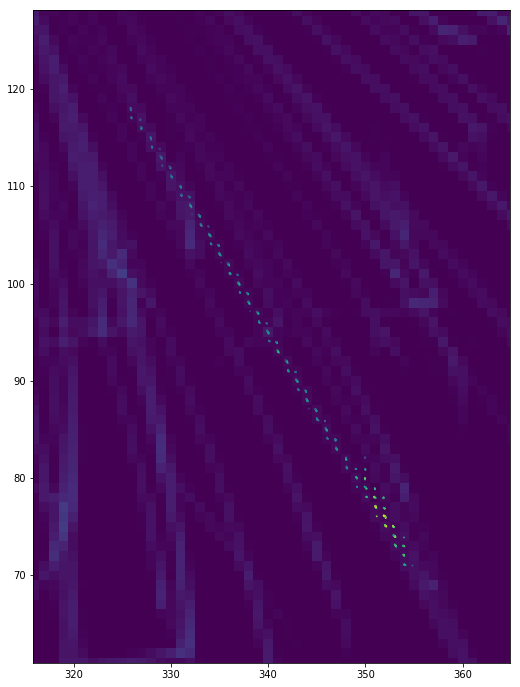

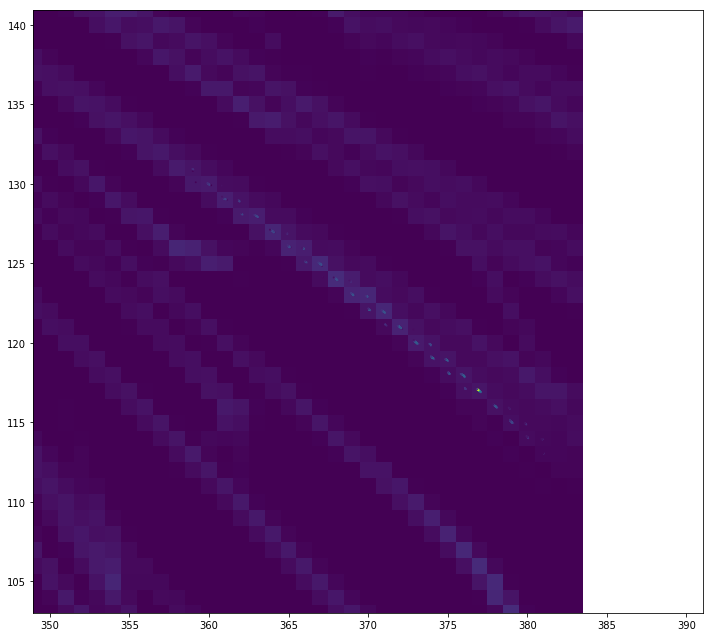

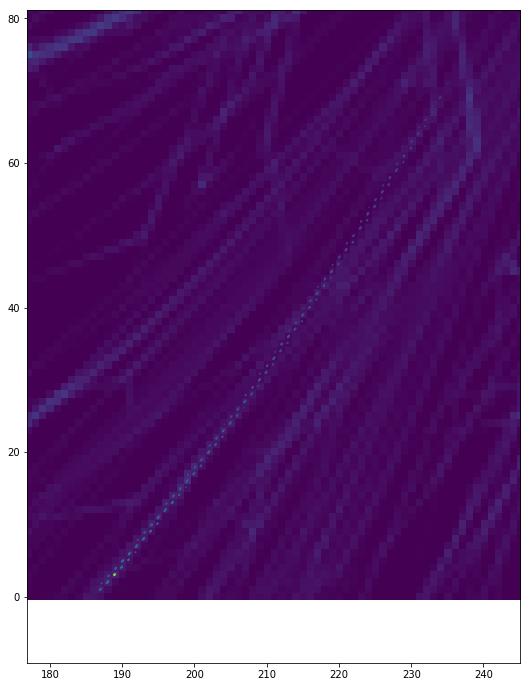

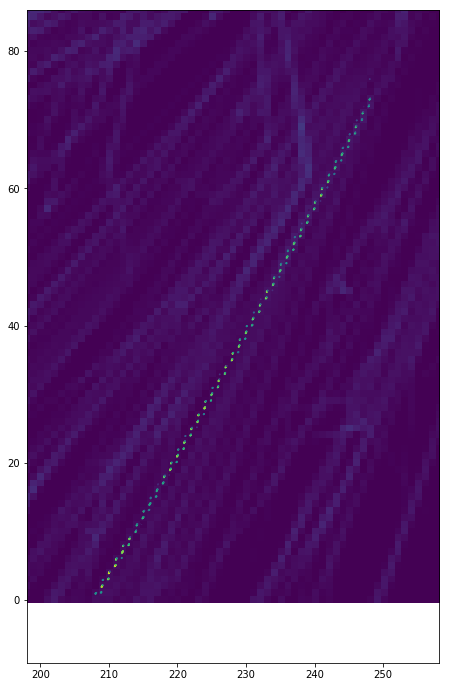

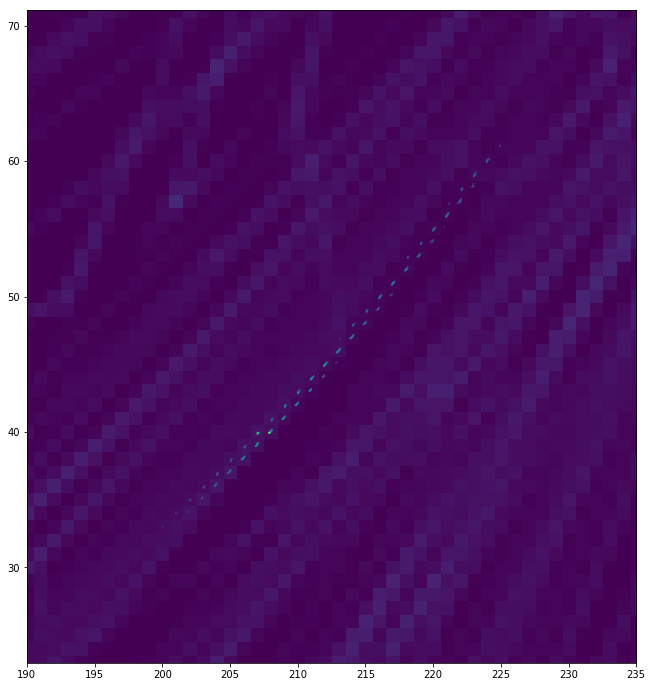

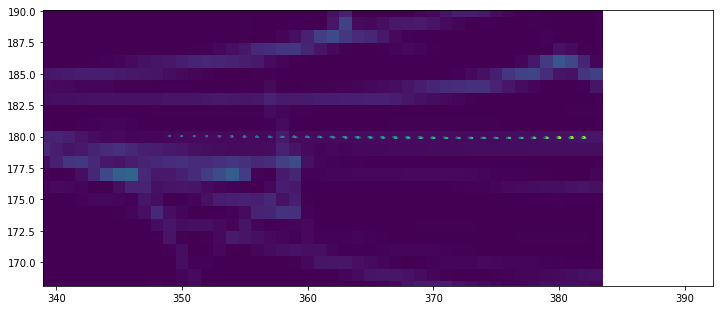

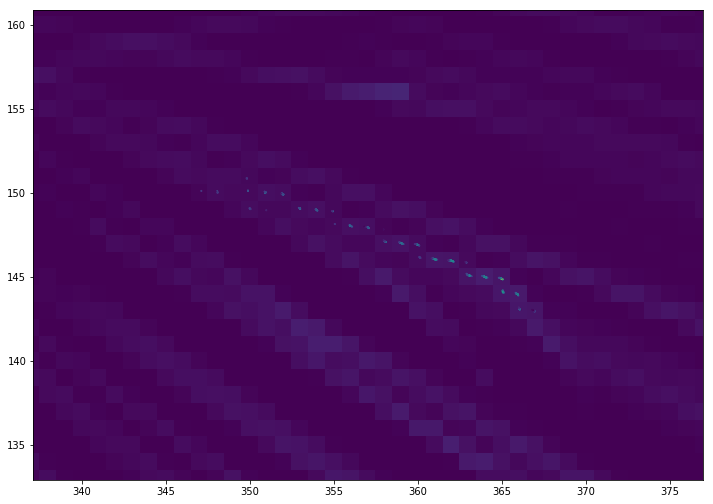

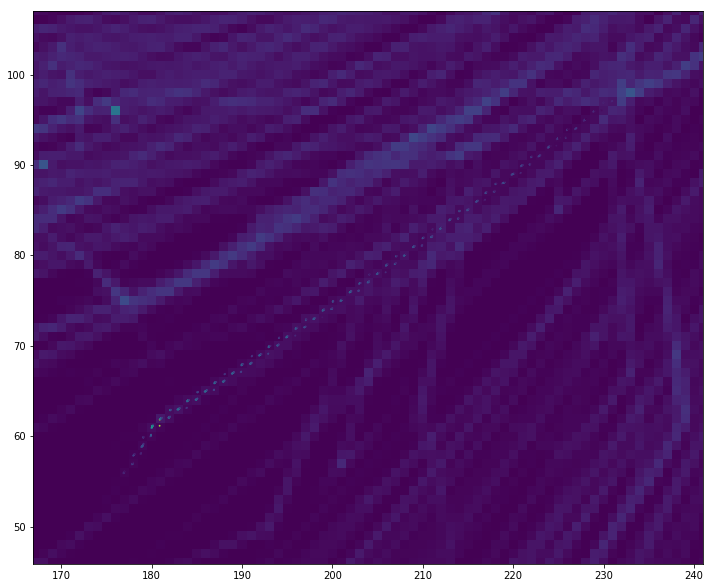

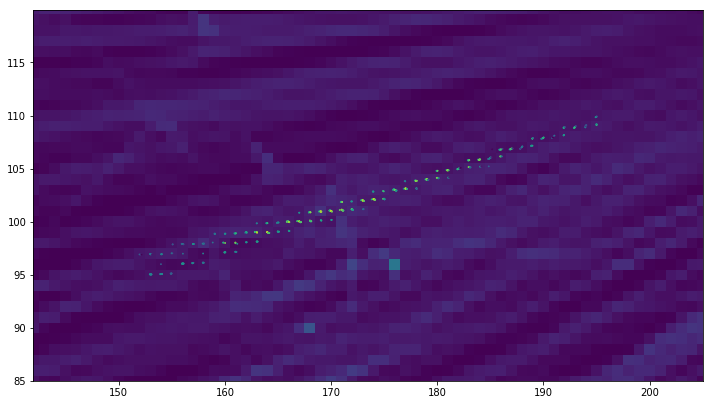

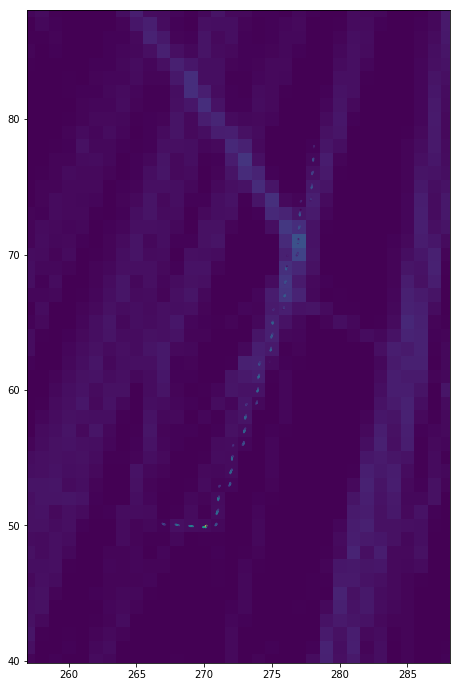

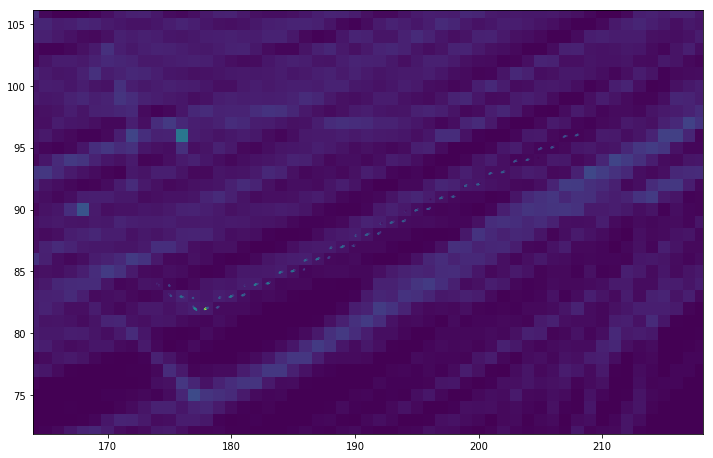

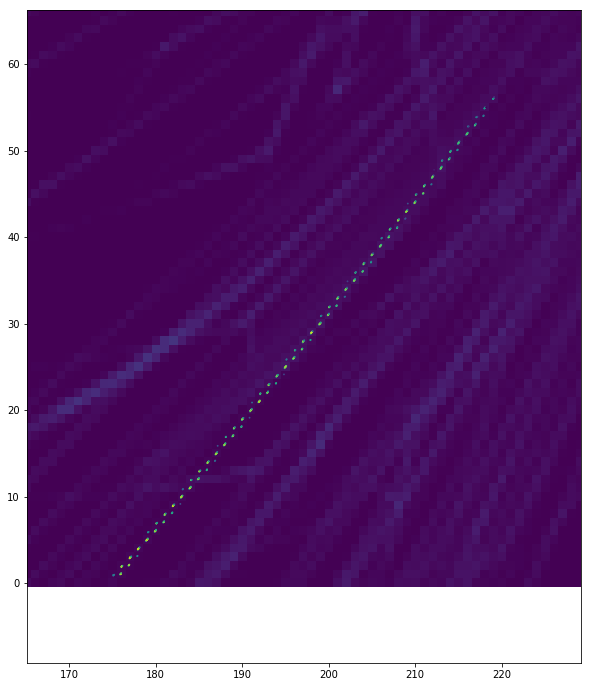

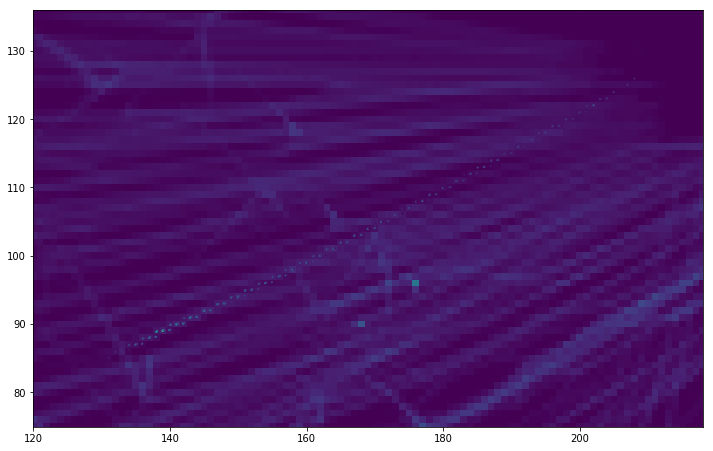

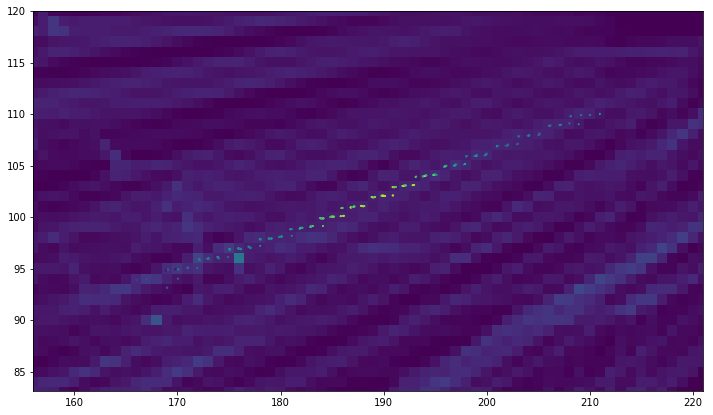

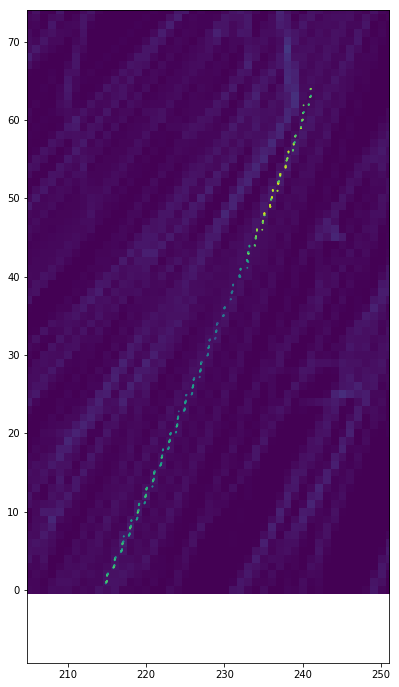

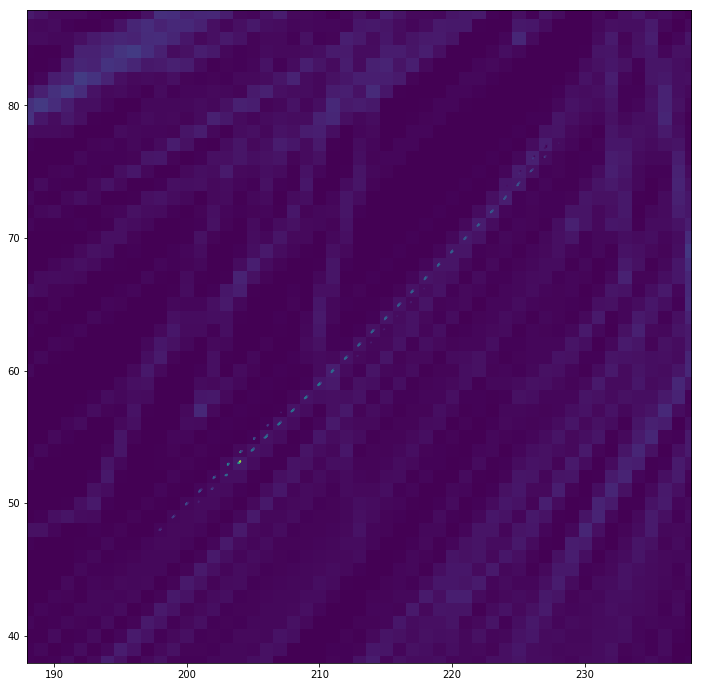

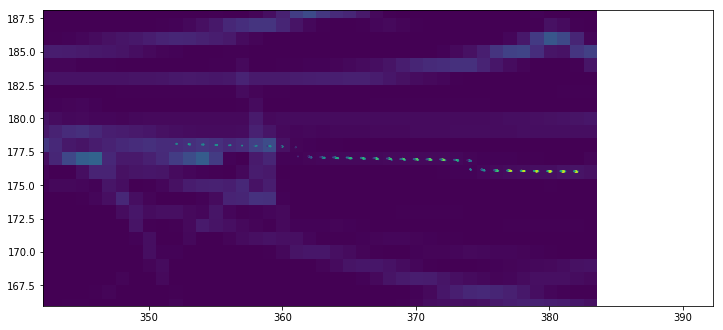

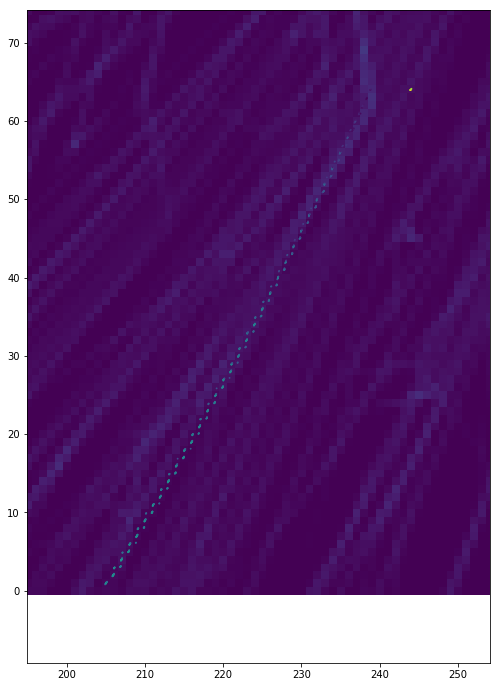

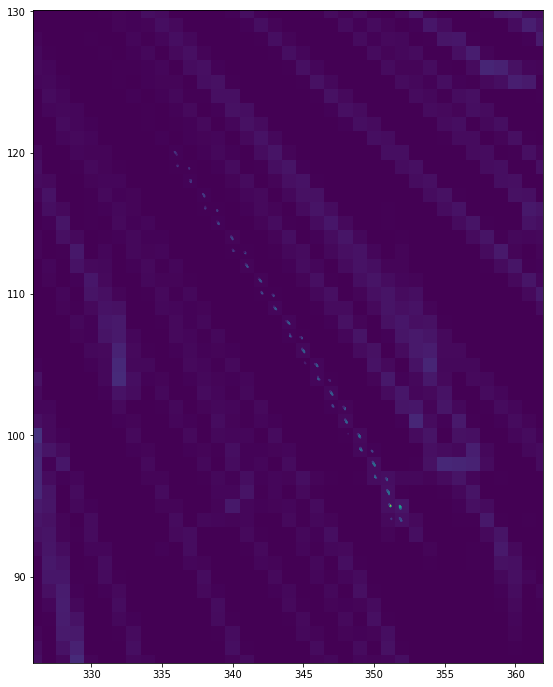

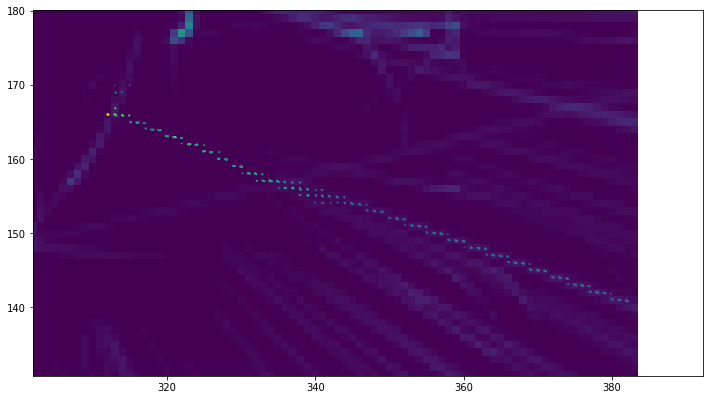

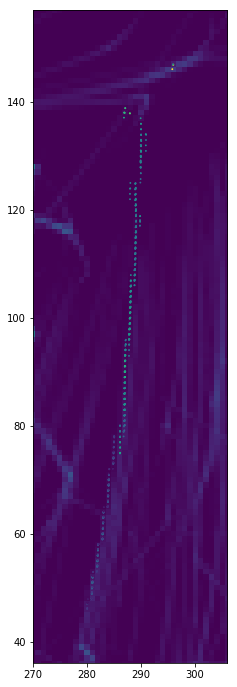

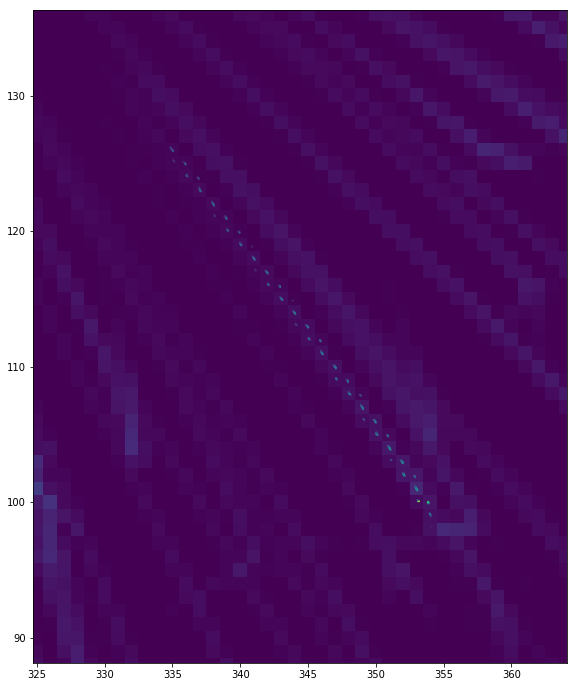

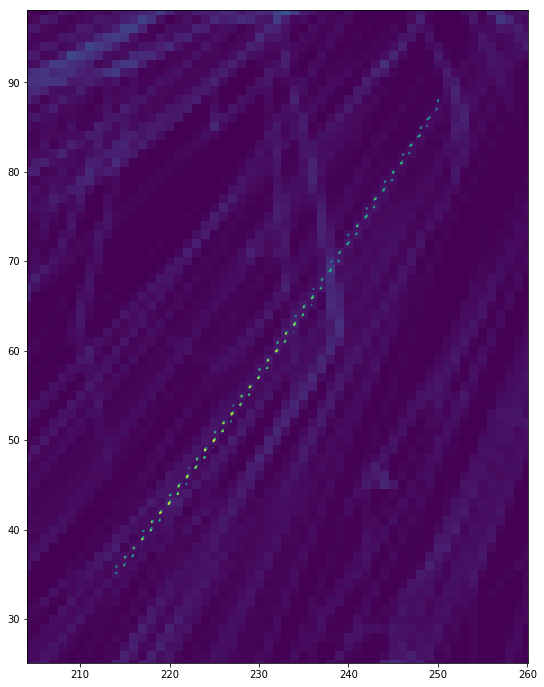

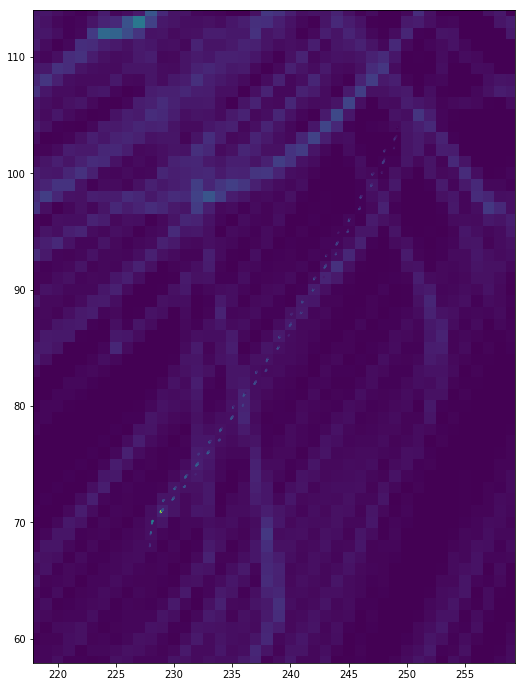

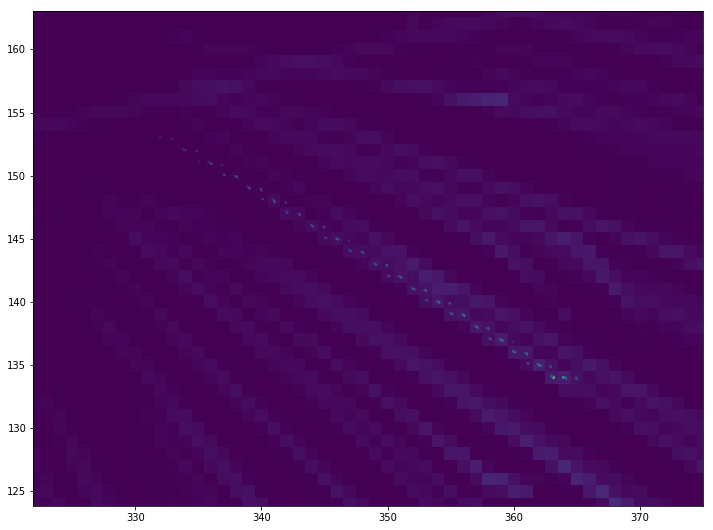

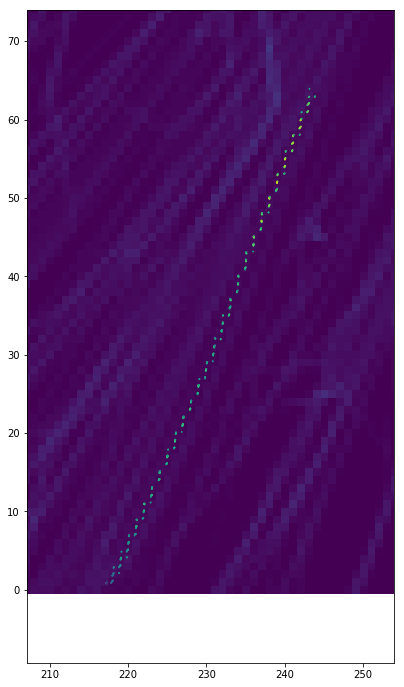

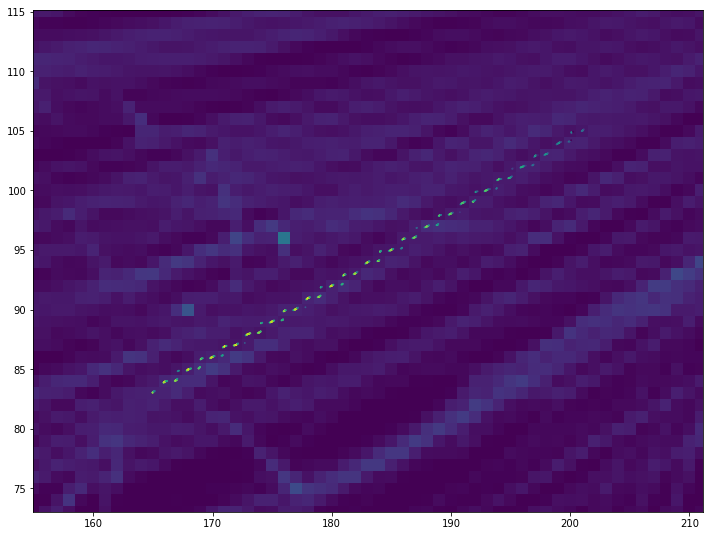

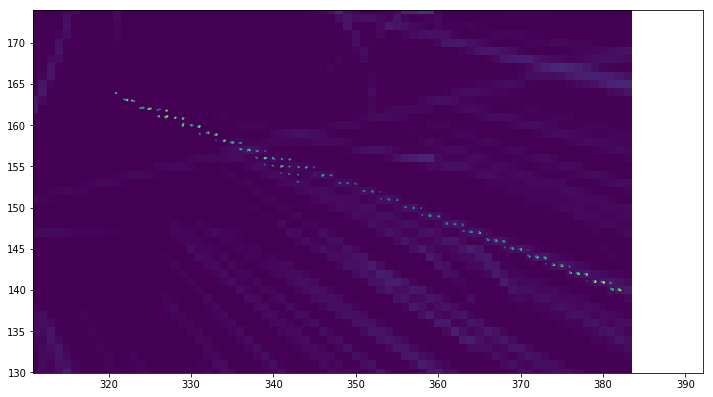

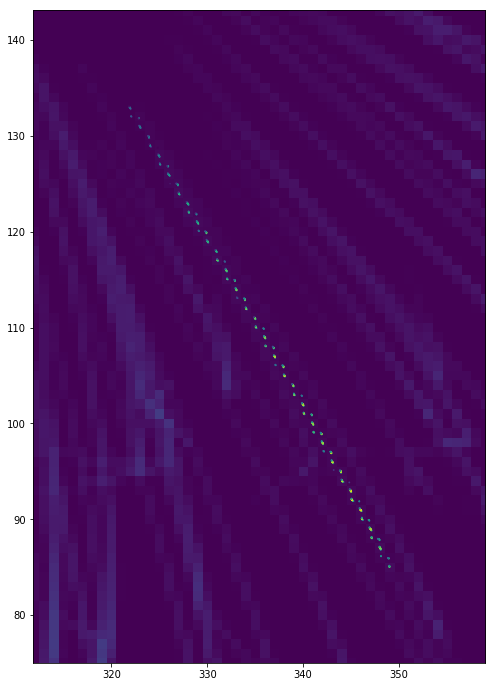

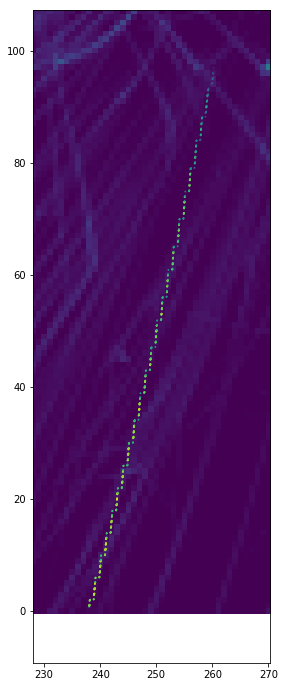

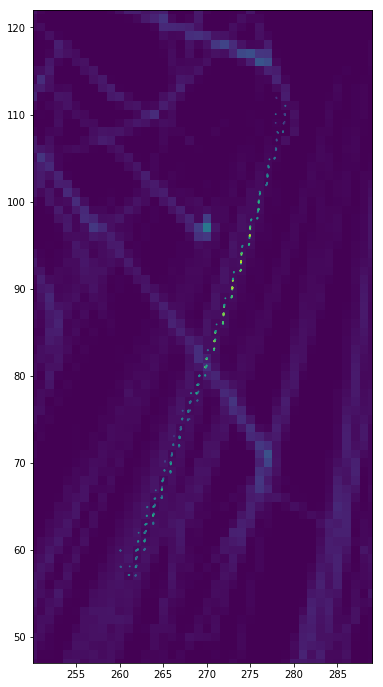

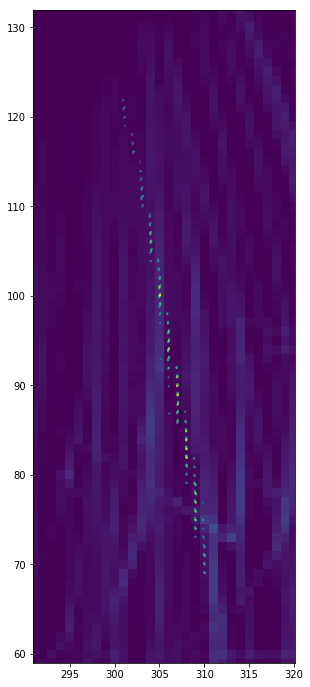

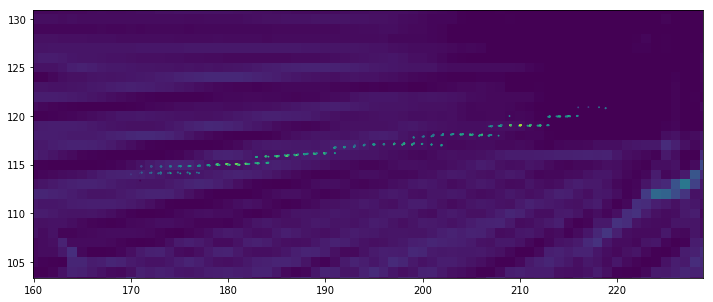

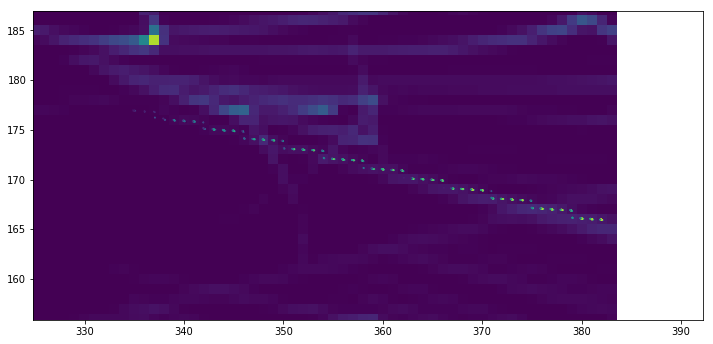

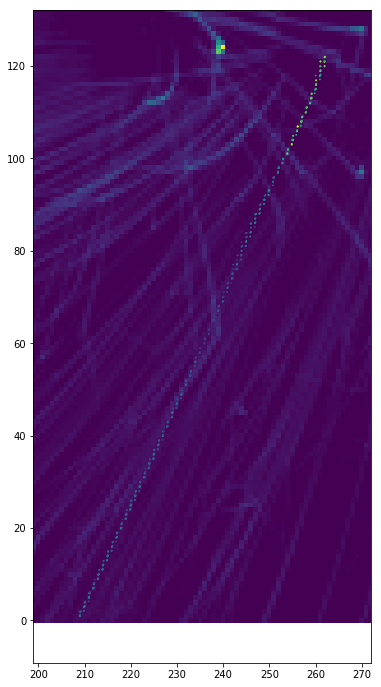

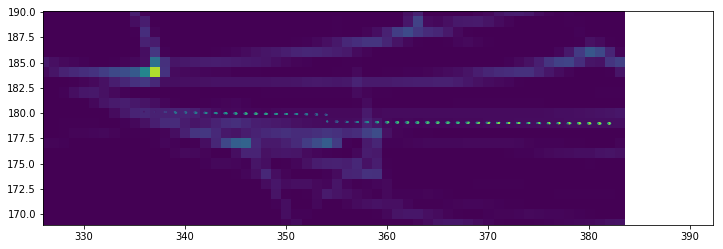

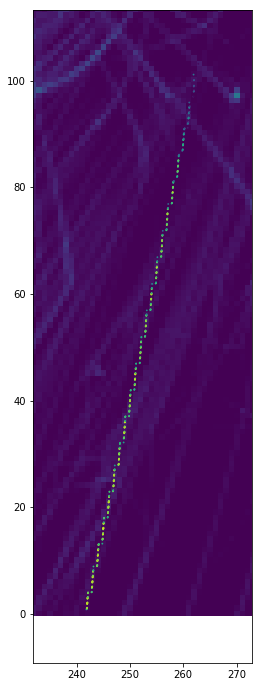

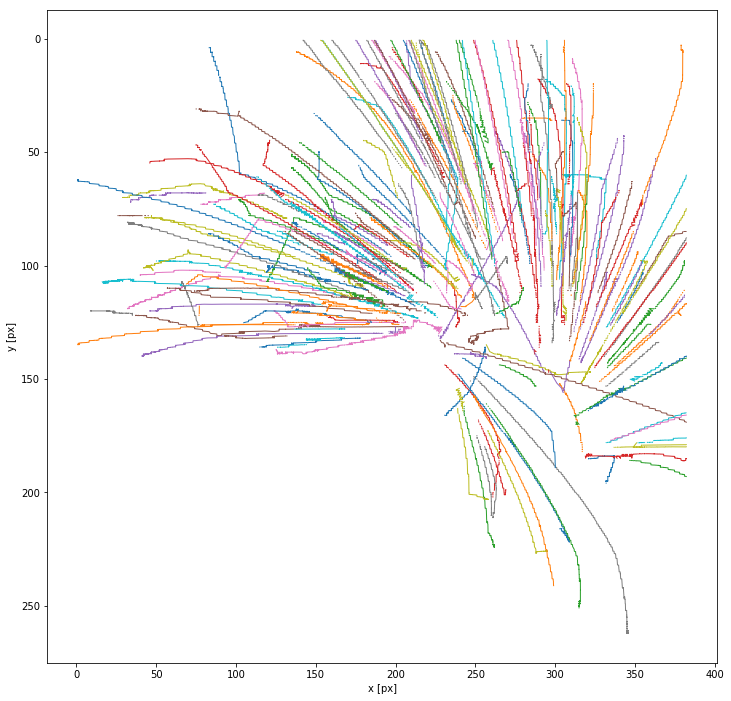

In [17]:
plt.figure(figsize=[12,12])
tp.plot_traj(tL3);

In [18]:
tL3.to_csv('trackL3_frameless.csv')